# データサイエンス100本ノック（構造化データ加工編） - Python
# for Google Colab

## 【注意】オリジナル版との変更点
1. Google Colab ではDockerを使えないので、2020.06.18時点の 100knocks-preprocess/docker/work/data にあるCSVファイルをPostgreSQLから入手する代わりに使います。
2. オリジナルのCSVデータ, geocode.csvの'latitude'列名の初めにスペースが入っていたため、それを削除しました。

   オリジナル(100knocks-preprocess ver.1.0): ' latitude' --> 'latitude'
   

4. オリジナルの解答を元に、必要のないlibraryはimportせず、そして必要なlibraryをAzureNotebookでインストールするように最初のセルを改変してあります。
5. また、SQLではなく上記CSVからデータを読み込むように'はじめに'の最初のセルを改変してあります。

## はじめに
- 初めに以下のセルを実行してください
- 必要なライブラリのインポートと~~データベース（PostgreSQL）~~ 100knocks-preprocess/docker/work/data にあるCSVファイルからのデータ読み込みを行います。geocode.csvに変更を加えたため、またgit cloneをするとColabの簡便さを損なうため、noguhiro2002のgithubレポジトリから直接読み込みます。
- pandas等、利用が想定されるライブラリは以下セルでインポートしています
- その他利用したいライブラリがあれば適宜インストールしてください（"!pip install ライブラリ名"でインストールも可能)
- オリジナルの解答例を元に、必要なライブラリーをpipでインストールします。
- 処理は複数回に分けても構いません
- 名前、住所等はダミーデータであり、実在するものではありません

In [2]:
# pipでオリジナルの解答に必要なライブラリーをインストール
#!pip install --upgrade pip
#!pip install -U pandas numpy scikit-learn imbalanced-learn

# pipでオリジナルの解答に必要なライブラリーをインポート
import os
import pandas as pd
import numpy as np
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from imblearn.under_sampling import RandomUnderSampler


# データを github/noguhiro2002/100knocks-preprocess/work/data フォルダよりDataframe形式でRead
# df_customer = pd.read_csv('https://raw.githubusercontent.com/The-Japan-DataScientist-Society/100knocks-preprocess/master/docker/work/data/customer.csv')
# df_category = pd.read_csv('https://raw.githubusercontent.com/The-Japan-DataScientist-Society/100knocks-preprocess/master/docker/work/data/category.csv')
# df_product = pd.read_csv('https://raw.githubusercontent.com/The-Japan-DataScientist-Society/100knocks-preprocess/master/docker/work/data/product.csv')
# df_receipt = pd.read_csv('https://raw.githubusercontent.com/The-Japan-DataScientist-Society/100knocks-preprocess/master/docker/work/data/receipt.csv')
# df_store = pd.read_csv('https://raw.githubusercontent.com/The-Japan-DataScientist-Society/100knocks-preprocess/master/docker/work/data/store.csv')
# df_geocode = pd.read_csv('https://raw.githubusercontent.com/noguhiro2002/100knocks-preprocess_ForColab-AzureNotebook/master/data/geocode.csv')
df_customer = pd.read_csv("data/customer.csv")
df_category = pd.read_csv("data/category.csv")
df_product = pd.read_csv("data/product.csv")
df_receipt = pd.read_csv("data/receipt.csv")
df_store = pd.read_csv("data/store.csv")
df_geocode = pd.read_csv("data/geocode.csv")


/mnt/c/git/koan/100knock/submit/kame-chan/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 演習問題

## P001

---
> P-001: レシート明細のデータフレーム（df_receipt）から全項目の先頭10件を表示し、どのようなデータを保有しているか目視で確認せよ。

In [2]:
df_receipt.head(10)

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158
1,20181118,1542499200,S13008,1132,2,CS008415000097,P070701017,1,81
2,20170712,1499817600,S14028,1102,1,CS028414000014,P060101005,1,170
3,20190205,1549324800,S14042,1132,1,ZZ000000000000,P050301001,1,25
4,20180821,1534809600,S14025,1102,2,CS025415000050,P060102007,1,90
5,20190605,1559692800,S13003,1112,1,CS003515000195,P050102002,1,138
6,20181205,1543968000,S14024,1102,2,CS024514000042,P080101005,1,30
7,20190922,1569110400,S14040,1102,1,CS040415000178,P070501004,1,128
8,20170504,1493856000,S13020,1112,2,ZZ000000000000,P071302010,1,770
9,20191010,1570665600,S14027,1102,1,CS027514000015,P071101003,1,680


## P002

---
> P-002: レシート明細のデータフレーム（df_receipt）から売上日（sales_ymd）、顧客ID（customer_id）、商品コード（product_cd）、売上金額（amount）の順に列を指定し、10件表示させよ。

In [3]:
df_receiptP002 = df_receipt[['sales_ymd', 'customer_id', 'product_cd', 'amount']]
df_receiptP002.head(10)

,sales_ymd,customer_id,product_cd,amount
0,20181103,CS006214000001,P070305012,158
1,20181118,CS008415000097,P070701017,81
2,20170712,CS028414000014,P060101005,170
3,20190205,ZZ000000000000,P050301001,25
4,20180821,CS025415000050,P060102007,90
5,20190605,CS003515000195,P050102002,138
6,20181205,CS024514000042,P080101005,30
7,20190922,CS040415000178,P070501004,128
8,20170504,ZZ000000000000,P071302010,770
9,20191010,CS027514000015,P071101003,680


## P003

---
> P-003: レシート明細のデータフレーム（df_receipt）から売上日（sales_ymd）、顧客ID（customer_id）、商品コード（product_cd）、売上金額（amount）の順に列を指定し、10件表示させよ。ただし、sales_ymdはsales_dateに項目名を変更しながら抽出すること。

In [4]:
df_receiptP003 = df_receiptP002.rename(columns={'sales_ymd': 'sales_date'})
df_receiptP003.head(10)

,sales_date,customer_id,product_cd,amount
0,20181103,CS006214000001,P070305012,158
1,20181118,CS008415000097,P070701017,81
2,20170712,CS028414000014,P060101005,170
3,20190205,ZZ000000000000,P050301001,25
4,20180821,CS025415000050,P060102007,90
5,20190605,CS003515000195,P050102002,138
6,20181205,CS024514000042,P080101005,30
7,20190922,CS040415000178,P070501004,128
8,20170504,ZZ000000000000,P071302010,770
9,20191010,CS027514000015,P071101003,680


## P004

---
> P-004: レシート明細のデータフレーム（df_receipt）から売上日（sales_ymd）、顧客ID（customer_id）、商品コード（product_cd）、売上金額（amount）の順に列を指定し、以下の条件を満たすデータを抽出せよ。
> - 顧客ID（customer_id）が"CS018205000001"

In [5]:
df_receiptP004 = df_receiptP002[df_receiptP002['customer_id'] == 'CS018205000001']
df_receiptP004

,sales_ymd,customer_id,product_cd,amount
36,20180911,CS018205000001,P071401012,2200
9843,20180414,CS018205000001,P060104007,600
21110,20170614,CS018205000001,P050206001,990
27673,20170614,CS018205000001,P060702015,108
27840,20190216,CS018205000001,P071005024,102
28757,20180414,CS018205000001,P071101002,278
39256,20190226,CS018205000001,P070902035,168
58121,20190924,CS018205000001,P060805001,495
68117,20190226,CS018205000001,P071401020,2200
72254,20180911,CS018205000001,P071401005,1100


## P005

---
> P-005: レシート明細のデータフレーム（df_receipt）から売上日（sales_ymd）、顧客ID（customer_id）、商品コード（product_cd）、売上金額（amount）の順に列を指定し、以下の条件を満たすデータを抽出せよ。
> - 顧客ID（customer_id）が"CS018205000001"
> - 売上金額（amount）が1,000以上

In [6]:
df_receiptP005 = df_receiptP002[(df_receiptP002['customer_id'] == 'CS018205000001') & (df_receiptP002['amount'] >= 1000)]
df_receiptP005

,sales_ymd,customer_id,product_cd,amount
36,20180911,CS018205000001,P071401012,2200
68117,20190226,CS018205000001,P071401020,2200
72254,20180911,CS018205000001,P071401005,1100


## P006

---
> P-006: レシート明細データフレーム「df_receipt」から売上日（sales_ymd）、顧客ID（customer_id）、商品コード（product_cd）、売上数量（quantity）、売上金額（amount）の順に列を指定し、以下の条件を満たすデータを抽出せよ。
> - 顧客ID（customer_id）が"CS018205000001"
> - 売上金額（amount）が1,000以上または売上数量（quantity）が5以上

In [7]:
df_receiptP006 = df_receipt[['sales_ymd', 'customer_id', 'product_cd', 'quantity', 'amount']]
df_receiptP006 = df_receiptP006[(df_receiptP006['customer_id'] == 'CS018205000001') & ((df_receiptP006['amount'] >= 1000) | (df_receiptP006['quantity'] >= 5))]
df_receiptP006

,sales_ymd,customer_id,product_cd,quantity,amount
36,20180911,CS018205000001,P071401012,1,2200
9843,20180414,CS018205000001,P060104007,6,600
21110,20170614,CS018205000001,P050206001,5,990
68117,20190226,CS018205000001,P071401020,1,2200
72254,20180911,CS018205000001,P071401005,1,1100


## P007

---
> P-007: レシート明細のデータフレーム（df_receipt）から売上日（sales_ymd）、顧客ID（customer_id）、商品コード（product_cd）、売上金額（amount）の順に列を指定し、以下の条件を満たすデータを抽出せよ。
> - 顧客ID（customer_id）が"CS018205000001"
> - 売上金額（amount）が1,000以上2,000以下

In [8]:
df_receiptP007 = df_receiptP002[(df_receiptP002['customer_id'] == 'CS018205000001') & (df_receiptP002['amount'] >= 1000) & (df_receiptP002['amount'] <= 2000)]
df_receiptP007

,sales_ymd,customer_id,product_cd,amount
72254,20180911,CS018205000001,P071401005,1100


## P008

---
> P-008: レシート明細のデータフレーム（df_receipt）から売上日（sales_ymd）、顧客ID（customer_id）、商品コード（product_cd）、売上金額（amount）の順に列を指定し、以下の条件を満たすデータを抽出せよ。
> - 顧客ID（customer_id）が"CS018205000001"
> - 商品コード（product_cd）が"P071401019"以外

In [9]:
df_receiptP008 = df_receiptP002[(df_receiptP002['customer_id'] == 'CS018205000001') & ~(df_receiptP002['product_cd']== "P071401019")]
df_receiptP008

,sales_ymd,customer_id,product_cd,amount
36,20180911,CS018205000001,P071401012,2200
9843,20180414,CS018205000001,P060104007,600
21110,20170614,CS018205000001,P050206001,990
27673,20170614,CS018205000001,P060702015,108
27840,20190216,CS018205000001,P071005024,102
28757,20180414,CS018205000001,P071101002,278
39256,20190226,CS018205000001,P070902035,168
58121,20190924,CS018205000001,P060805001,495
68117,20190226,CS018205000001,P071401020,2200
72254,20180911,CS018205000001,P071401005,1100


## P009

---
> P-009: 以下の処理において、出力結果を変えずにORをANDに書き換えよ。

`df_store.query('not(prefecture_cd == "13" | floor_area > 900)')`

In [10]:
df_store.query('not(prefecture_cd == "13" | floor_area > 900)')

,store_cd,store_name,prefecture_cd,prefecture,address,address_kana,tel_no,longitude,latitude,floor_area
18,S14046,北山田店,14,神奈川県,神奈川県横浜市都筑区北山田一丁目,カナガワケンヨコハマシツヅキクキタヤマタイッチョウメ,045-123-4049,139.5916,35.56189,831.0
20,S14011,日吉本町店,14,神奈川県,神奈川県横浜市港北区日吉本町四丁目,カナガワケンヨコハマシコウホククヒヨシホンチョウヨンチョウメ,045-123-4033,139.6316,35.54655,890.0
38,S12013,習志野店,12,千葉県,千葉県習志野市芝園一丁目,チバケンナラシノシシバゾノイッチョウメ,047-123-4002,140.0220,35.66122,808.0


In [11]:
df_store.query('(~(prefecture_cd == "13") & ~(floor_area > 900))')

,store_cd,store_name,prefecture_cd,prefecture,address,address_kana,tel_no,longitude,latitude,floor_area
18,S14046,北山田店,14,神奈川県,神奈川県横浜市都筑区北山田一丁目,カナガワケンヨコハマシツヅキクキタヤマタイッチョウメ,045-123-4049,139.5916,35.56189,831.0
20,S14011,日吉本町店,14,神奈川県,神奈川県横浜市港北区日吉本町四丁目,カナガワケンヨコハマシコウホククヒヨシホンチョウヨンチョウメ,045-123-4033,139.6316,35.54655,890.0
38,S12013,習志野店,12,千葉県,千葉県習志野市芝園一丁目,チバケンナラシノシシバゾノイッチョウメ,047-123-4002,140.0220,35.66122,808.0


## P010

---
> P-010: 店舗データフレーム（df_store）から、店舗コード（store_cd）が"S14"で始まるものだけ全項目抽出し、10件だけ表示せよ。

In [12]:
df_storeP010 = df_store[df_store["store_cd"].str.startswith("S14")]
df_storeP010.head(10)

,store_cd,store_name,prefecture_cd,prefecture,address,address_kana,tel_no,longitude,latitude,floor_area
2,S14010,菊名店,14,神奈川県,神奈川県横浜市港北区菊名一丁目,カナガワケンヨコハマシコウホククキクナイッチョウメ,045-123-4032,139.6326,35.50049,1732.0
3,S14033,阿久和店,14,神奈川県,神奈川県横浜市瀬谷区阿久和西一丁目,カナガワケンヨコハマシセヤクアクワニシイッチョウメ,045-123-4043,139.4961,35.45918,1495.0
4,S14036,相模原中央店,14,神奈川県,神奈川県相模原市中央二丁目,カナガワケンサガミハラシチュウオウニチョウメ,042-123-4045,139.3716,35.57327,1679.0
7,S14040,長津田店,14,神奈川県,神奈川県横浜市緑区長津田みなみ台五丁目,カナガワケンヨコハマシミドリクナガツタミナミダイゴチョウメ,045-123-4046,139.4994,35.52398,1548.0
9,S14050,阿久和西店,14,神奈川県,神奈川県横浜市瀬谷区阿久和西一丁目,カナガワケンヨコハマシセヤクアクワニシイッチョウメ,045-123-4053,139.4961,35.45918,1830.0
12,S14028,二ツ橋店,14,神奈川県,神奈川県横浜市瀬谷区二ツ橋町,カナガワケンヨコハマシセヤクフタツバシチョウ,045-123-4042,139.4963,35.46304,1574.0
16,S14012,本牧和田店,14,神奈川県,神奈川県横浜市中区本牧和田,カナガワケンヨコハマシナカクホンモクワダ,045-123-4034,139.6582,35.42156,1341.0
18,S14046,北山田店,14,神奈川県,神奈川県横浜市都筑区北山田一丁目,カナガワケンヨコハマシツヅキクキタヤマタイッチョウメ,045-123-4049,139.5916,35.56189,831.0
19,S14022,逗子店,14,神奈川県,神奈川県逗子市逗子一丁目,カナガワケンズシシズシイッチョウメ,046-123-4036,139.5789,35.29642,1838.0
20,S14011,日吉本町店,14,神奈川県,神奈川県横浜市港北区日吉本町四丁目,カナガワケンヨコハマシコウホククヒヨシホンチョウヨンチョウメ,045-123-4033,139.6316,35.54655,890.0


## P011

---
> P-011: 顧客データフレーム（df_customer）から顧客ID（customer_id）の末尾が1のものだけ全項目抽出し、10件だけ表示せよ。

In [13]:
df_customerP011 = df_customer[df_customer["customer_id"].str.endswith("1")]
df_customerP011.head(10)

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
1,CS037613000071,六角 雅彦,9,不明,1952-04-01,66,136-0076,東京都江東区南砂**********,S13037,20150414,0-00000000-0
3,CS028811000001,堀井 かおり,1,女性,1933-03-27,86,245-0016,神奈川県横浜市泉区和泉町**********,S14028,20160115,0-00000000-0
14,CS040412000191,川井 郁恵,1,女性,1977-01-05,42,226-0021,神奈川県横浜市緑区北八朔町**********,S14040,20151101,1-20091025-4
31,CS028314000011,小菅 あおい,1,女性,1983-11-26,35,246-0038,神奈川県横浜市瀬谷区宮沢**********,S14028,20151123,1-20080426-5
56,CS039212000051,藤島 恵梨香,1,女性,1997-02-03,22,166-0001,東京都杉並区阿佐谷北**********,S13039,20171121,1-20100215-4
59,CS015412000111,松居 奈月,1,女性,1972-10-04,46,136-0071,東京都江東区亀戸**********,S13015,20150629,0-00000000-0
63,CS004702000041,野島 洋,0,男性,1943-08-24,75,176-0022,東京都練馬区向山**********,S13004,20170218,0-00000000-0
74,CS041515000001,栗田 千夏,1,女性,1967-01-02,52,206-0001,東京都多摩市和田**********,S13041,20160422,E-20100803-F
85,CS029313000221,北条 ひかり,1,女性,1987-06-19,31,279-0011,千葉県浦安市美浜**********,S12029,20180810,0-00000000-0
102,CS034312000071,望月 奈央,1,女性,1980-09-20,38,213-0026,神奈川県川崎市高津区久末**********,S14034,20160106,0-00000000-0


## P012

---
> P-012: 店舗データフレーム（df_store）から横浜市の店舗だけ全項目表示せよ。

In [14]:
df_storeP012 = df_store[df_store["address"].str.contains("横浜市")]
df_storeP012

,store_cd,store_name,prefecture_cd,prefecture,address,address_kana,tel_no,longitude,latitude,floor_area
2,S14010,菊名店,14,神奈川県,神奈川県横浜市港北区菊名一丁目,カナガワケンヨコハマシコウホククキクナイッチョウメ,045-123-4032,139.6326,35.50049,1732.0
3,S14033,阿久和店,14,神奈川県,神奈川県横浜市瀬谷区阿久和西一丁目,カナガワケンヨコハマシセヤクアクワニシイッチョウメ,045-123-4043,139.4961,35.45918,1495.0
7,S14040,長津田店,14,神奈川県,神奈川県横浜市緑区長津田みなみ台五丁目,カナガワケンヨコハマシミドリクナガツタミナミダイゴチョウメ,045-123-4046,139.4994,35.52398,1548.0
9,S14050,阿久和西店,14,神奈川県,神奈川県横浜市瀬谷区阿久和西一丁目,カナガワケンヨコハマシセヤクアクワニシイッチョウメ,045-123-4053,139.4961,35.45918,1830.0
12,S14028,二ツ橋店,14,神奈川県,神奈川県横浜市瀬谷区二ツ橋町,カナガワケンヨコハマシセヤクフタツバシチョウ,045-123-4042,139.4963,35.46304,1574.0
16,S14012,本牧和田店,14,神奈川県,神奈川県横浜市中区本牧和田,カナガワケンヨコハマシナカクホンモクワダ,045-123-4034,139.6582,35.42156,1341.0
18,S14046,北山田店,14,神奈川県,神奈川県横浜市都筑区北山田一丁目,カナガワケンヨコハマシツヅキクキタヤマタイッチョウメ,045-123-4049,139.5916,35.56189,831.0
20,S14011,日吉本町店,14,神奈川県,神奈川県横浜市港北区日吉本町四丁目,カナガワケンヨコハマシコウホククヒヨシホンチョウヨンチョウメ,045-123-4033,139.6316,35.54655,890.0
26,S14048,中川中央店,14,神奈川県,神奈川県横浜市都筑区中川中央二丁目,カナガワケンヨコハマシツヅキクナカガワチュウオウニチョウメ,045-123-4051,139.5758,35.54912,1657.0
40,S14042,新山下店,14,神奈川県,神奈川県横浜市中区新山下二丁目,カナガワケンヨコハマシナカクシンヤマシタニチョウメ,045-123-4047,139.6593,35.43894,1044.0


## P013

---
> P-013: 顧客データフレーム（df_customer）から、ステータスコード（status_cd）の先頭がアルファベットのA〜Fで始まるデータを全項目抽出し、10件だけ表示せよ。

In [15]:
df_customerP013 = df_customer[df_customer["status_cd"].str.match('[A-F]+.*')]
df_customerP013.head(10)

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
2,CS031415000172,宇多田 貴美子,1,女性,1976-10-04,42,151-0053,東京都渋谷区代々木**********,S13031,20150529,D-20100325-C
6,CS015414000103,奥野 陽子,1,女性,1977-08-09,41,136-0073,東京都江東区北砂**********,S13015,20150722,B-20100609-B
12,CS011215000048,芦田 沙耶,1,女性,1992-02-01,27,223-0062,神奈川県横浜市港北区日吉本町**********,S14011,20150228,C-20100421-9
15,CS029415000023,梅田 里穂,1,女性,1976-01-17,43,279-0043,千葉県浦安市富士見**********,S12029,20150610,D-20100918-E
21,CS035415000029,寺沢 真希,9,不明,1977-09-27,41,158-0096,東京都世田谷区玉川台**********,S13035,20141220,F-20101029-F
32,CS031415000106,宇野 由美子,1,女性,1970-02-26,49,151-0053,東京都渋谷区代々木**********,S13031,20150201,F-20100511-E
33,CS029215000025,石倉 美帆,1,女性,1993-09-28,25,279-0022,千葉県浦安市今川**********,S12029,20150708,B-20100820-C
40,CS033605000005,猪股 雄太,0,男性,1955-12-05,63,246-0031,神奈川県横浜市瀬谷区瀬谷**********,S14033,20150425,F-20100917-E
44,CS033415000229,板垣 菜々美,1,女性,1977-11-07,41,246-0021,神奈川県横浜市瀬谷区二ツ橋町**********,S14033,20150712,F-20100326-E
53,CS008415000145,黒谷 麻緒,1,女性,1977-06-27,41,157-0067,東京都世田谷区喜多見**********,S13008,20150829,F-20100622-F


## P014

---
> P-014: 顧客データフレーム（df_customer）から、ステータスコード（status_cd）の末尾が数字の1〜9で終わるデータを全項目抽出し、10件だけ表示せよ。

In [16]:
df_customerP014 = df_customer[df_customer["status_cd"].str.match('.*[1-9]+$')]
df_customerP014.tail(10)

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
21927,CS020614000011,河内 一徳,9,不明,1954-05-22,64,114-0032,東京都北区中十条**********,S13020,20151212,8-20100802-2
21930,CS010315000110,梶原 めぐみ,1,女性,1987-03-03,32,222-0026,神奈川県横浜市港北区篠原町**********,S14010,20150520,1-20090424-1
21932,CS035511000040,仲村 しぼり,1,女性,1959-08-07,59,157-0063,東京都世田谷区粕谷**********,S13035,20151021,2-20100131-4
21935,CS044415000024,杉野 千佳子,1,女性,1977-06-02,41,144-0052,東京都大田区蒲田**********,S13044,20180519,6-20101016-9
21937,CS021411000017,筒井 里奈,1,女性,1972-02-06,47,243-0121,神奈川県厚木市七沢**********,S14021,20150209,7-20090515-9
21943,CS002515000242,加瀬 はるみ,1,女性,1966-06-23,52,184-0015,東京都小金井市貫井北町**********,S13002,20170102,A-20100124-7
21946,CS034412000010,末永 まひる,1,女性,1971-07-23,47,213-0035,神奈川県川崎市高津区向ケ丘**********,S14034,20150327,3-20090322-5
21952,CS002513000310,柳田 美嘉,1,女性,1963-09-17,55,187-0022,東京都小平市上水本町**********,S13002,20160911,1-20100711-2
21955,CS001413000156,上原 恵望子,1,女性,1974-12-10,44,144-0056,東京都大田区西六郷**********,S13001,20150724,1-20080210-1
21956,CS040314000065,谷川 紗季,1,女性,1987-01-14,32,226-0027,神奈川県横浜市緑区長津田**********,S14040,20150703,1-20090421-4


In [17]:
len(df_customerP014)

4970

In [18]:
str_list = [str(n) for n in list(range(1,10))]
str_tuple = tuple(str_list)
#str_tuple
df_customerP014_2 = df_customer[df_customer['status_cd'].str.endswith(str_tuple)]

In [19]:
len(df_customerP014_2)

4970

## P015

---
> P-015: 顧客データフレーム（df_customer）から、ステータスコード（status_cd）の先頭がアルファベットのA〜Fで始まり、末尾が数字の1〜9で終わるデータを全項目抽出し、10件だけ表示せよ。

In [20]:
# df_customerP015 = df_customer[(df_customer["status_cd"].str.match('[A-F]+.*')) & (df_customer["status_cd"].str.match('.*[1-9]+$'))]
df_customerP015 = df_customer[(df_customer["status_cd"].str.match('[A-F]+.*[1-9]+$'))]
df_customerP015.head(10)

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
12,CS011215000048,芦田 沙耶,1,女性,1992-02-01,27,223-0062,神奈川県横浜市港北区日吉本町**********,S14011,20150228,C-20100421-9
68,CS022513000105,島村 貴美子,1,女性,1962-03-12,57,249-0002,神奈川県逗子市山の根**********,S14022,20150320,A-20091115-7
71,CS001515000096,水野 陽子,9,不明,1960-11-29,58,144-0053,東京都大田区蒲田本町**********,S13001,20150614,A-20100724-7
122,CS013615000053,西脇 季衣,1,女性,1953-10-18,65,261-0026,千葉県千葉市美浜区幕張西**********,S12013,20150128,B-20100329-6
144,CS020412000161,小宮 薫,1,女性,1974-05-21,44,174-0042,東京都板橋区東坂下**********,S13020,20150822,B-20081021-3
178,CS001215000097,竹中 あさみ,1,女性,1990-07-25,28,146-0095,東京都大田区多摩川**********,S13001,20170315,A-20100211-2
252,CS035212000007,内村 恵梨香,1,女性,1990-12-04,28,152-0023,東京都目黒区八雲**********,S13035,20151013,B-20101018-6
259,CS002515000386,野田 コウ,1,女性,1963-05-30,55,185-0013,東京都国分寺市西恋ケ窪**********,S13002,20160410,C-20100127-8
293,CS001615000372,稲垣 寿々花,1,女性,1956-10-29,62,144-0035,東京都大田区南蒲田**********,S13001,20170403,A-20100104-1
297,CS032512000121,松井 知世,1,女性,1962-09-04,56,210-0011,神奈川県川崎市川崎区富士見**********,S13032,20150727,A-20100103-5


## P016

---
> P-016: 店舗データフレーム（df_store）から、電話番号（tel_no）が3桁-3桁-4桁のデータを全項目表示せよ。

In [21]:
df_storeP016 = df_store[df_store["tel_no"].str.match("^[0-9]{3}-[0-9]{3}-[0-9]{4}$")]
df_storeP016.head()

,store_cd,store_name,prefecture_cd,prefecture,address,address_kana,tel_no,longitude,latitude,floor_area
0,S12014,千草台店,12,千葉県,千葉県千葉市稲毛区千草台一丁目,チバケンチバシイナゲクチグサダイイッチョウメ,043-123-4003,140.1180,35.63559,1698.0
1,S13002,国分寺店,13,東京都,東京都国分寺市本多二丁目,トウキョウトコクブンジシホンダニチョウメ,042-123-4008,139.4802,35.70566,1735.0
2,S14010,菊名店,14,神奈川県,神奈川県横浜市港北区菊名一丁目,カナガワケンヨコハマシコウホククキクナイッチョウメ,045-123-4032,139.6326,35.50049,1732.0
3,S14033,阿久和店,14,神奈川県,神奈川県横浜市瀬谷区阿久和西一丁目,カナガワケンヨコハマシセヤクアクワニシイッチョウメ,045-123-4043,139.4961,35.45918,1495.0
4,S14036,相模原中央店,14,神奈川県,神奈川県相模原市中央二丁目,カナガワケンサガミハラシチュウオウニチョウメ,042-123-4045,139.3716,35.57327,1679.0


## P017

---
> P-17: 顧客データフレーム（df_customer）を生年月日（birth_day）で高齢順にソートし、先頭10件を全項目表示せよ。

In [22]:
df_customerP017 = df_customer.sort_values("birth_day").head(10)
df_customerP017

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
18817,CS003813000014,村山 菜々美,1,女性,1928-11-26,90,182-0007,東京都調布市菊野台**********,S13003,20160214,0-00000000-0
12328,CS026813000004,吉村 朝陽,1,女性,1928-12-14,90,251-0043,神奈川県藤沢市辻堂元町**********,S14026,20150723,0-00000000-0
15682,CS018811000003,熊沢 美里,1,女性,1929-01-07,90,204-0004,東京都清瀬市野塩**********,S13018,20150403,0-00000000-0
15302,CS027803000004,内村 拓郎,0,男性,1929-01-12,90,251-0031,神奈川県藤沢市鵠沼藤が谷**********,S14027,20151227,0-00000000-0
1681,CS013801000003,天野 拓郎,0,男性,1929-01-15,90,274-0824,千葉県船橋市前原東**********,S12013,20160120,0-00000000-0
7511,CS001814000022,鶴田 里穂,1,女性,1929-01-28,90,144-0045,東京都大田区南六郷**********,S13001,20161012,A-20090415-7
2378,CS016815000002,山元 美紀,1,女性,1929-02-22,90,184-0005,東京都小金井市桜町**********,S13016,20150629,C-20090923-C
4680,CS009815000003,中田 里穂,1,女性,1929-04-08,89,154-0014,東京都世田谷区新町**********,S13009,20150421,D-20091021-E
16070,CS005813000015,金谷 恵梨香,1,女性,1929-04-09,89,165-0032,東京都中野区鷺宮**********,S13005,20150506,0-00000000-0
6305,CS012813000013,宇野 南朋,1,女性,1929-04-09,89,231-0806,神奈川県横浜市中区本牧町**********,S14012,20150712,0-00000000-0


## P018

---
> P-18: 顧客データフレーム（df_customer）を生年月日（birth_day）で若い順にソートし、先頭10件を全項目表示せよ。

In [23]:
df_customerP018 = df_customer.sort_values("birth_day", ascending=False).head(10)
df_customerP018

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
15639,CS035114000004,大村 美里,1,女性,2007-11-25,11,156-0053,東京都世田谷区桜**********,S13035,20150619,6-20091205-6
7468,CS022103000002,福山 はじめ,9,不明,2007-10-02,11,249-0006,神奈川県逗子市逗子**********,S14022,20160909,0-00000000-0
10745,CS002113000009,柴田 真悠子,1,女性,2007-09-17,11,184-0014,東京都小金井市貫井南町**********,S13002,20160304,0-00000000-0
19811,CS004115000014,松井 京子,1,女性,2007-08-09,11,165-0031,東京都中野区上鷺宮**********,S13004,20161120,1-20081231-1
7039,CS002114000010,山内 遥,1,女性,2007-06-03,11,184-0015,東京都小金井市貫井北町**********,S13002,20160920,6-20100510-1
3670,CS025115000002,小柳 夏希,1,女性,2007-04-18,11,245-0018,神奈川県横浜市泉区上飯田町**********,S14025,20160116,D-20100913-D
12493,CS002113000025,広末 まなみ,1,女性,2007-03-30,12,184-0015,東京都小金井市貫井北町**********,S13002,20171030,0-00000000-0
15977,CS033112000003,長野 美紀,1,女性,2007-03-22,12,245-0051,神奈川県横浜市戸塚区名瀬町**********,S14033,20150606,0-00000000-0
5716,CS007115000006,福岡 瞬,1,女性,2007-03-10,12,285-0845,千葉県佐倉市西志津**********,S12007,20151118,F-20101016-F
15097,CS014113000008,矢口 莉緒,1,女性,2007-03-05,12,260-0041,千葉県千葉市中央区東千葉**********,S12014,20150622,3-20091108-6


## P019

---
> P-19: レシート明細データフレーム（df_receipt）に対し、1件あたりの売上金額（amount）が高い順にランクを付与し、先頭10件を抽出せよ。項目は顧客ID（customer_id）、売上金額（amount）、付与したランクを表示させること。なお、売上金額（amount）が等しい場合は同一順位を付与するものとする。

In [24]:
df_receiptP019 = df_receipt.copy()
df_receiptP019["rank"] = df_receipt["amount"].rank(method="min", ascending=False)
df_receiptP019 = df_receiptP019.sort_values("rank")
df_receiptP019.head(10)

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount,rank
1202,20190903,1567468800,S14011,1192,2,CS011415000006,P080104055,1,10925,1.0
62317,20190304,1551657600,S14046,1152,2,ZZ000000000000,P090302118,1,6800,2.0
54095,20170921,1505952000,S14028,1192,2,CS028605000002,P090907210,1,5780,3.0
4632,20170721,1500595200,S13015,1112,1,CS015515000034,P090907208,1,5480,4.0
72747,20190724,1563926400,S13009,1192,2,ZZ000000000000,P090907209,1,5480,4.0
10320,20190103,1546473600,S14021,1162,2,ZZ000000000000,P090907208,1,5480,4.0
97294,20190209,1549670400,S14021,1142,2,CS021515000089,P090907206,1,5440,7.0
28304,20180621,1529539200,S13004,1172,2,ZZ000000000000,P090907206,1,5440,7.0
92246,20180212,1518393600,S13009,1142,1,CS009415000038,P071301009,1,5280,9.0
68553,20181021,1540080000,S14040,1182,2,CS040415000200,P071301009,1,5280,9.0


## P020

---
> P-020: レシート明細データフレーム（df_receipt）に対し、1件あたりの売上金額（amount）が高い順にランクを付与し、先頭10件を抽出せよ。項目は顧客ID（customer_id）、売上金額（amount）、付与したランクを表示させること。なお、売上金額（amount）が等しい場合でも別順位を付与すること。

In [25]:
df_receiptP020 = df_receipt.copy()
df_receiptP020["rank"] = df_receipt["amount"].rank(method="first", ascending=False)
df_receiptP020 = df_receiptP020.sort_values("rank")
df_receiptP020.head(10)

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount,rank
1202,20190903,1567468800,S14011,1192,2,CS011415000006,P080104055,1,10925,1.0
62317,20190304,1551657600,S14046,1152,2,ZZ000000000000,P090302118,1,6800,2.0
54095,20170921,1505952000,S14028,1192,2,CS028605000002,P090907210,1,5780,3.0
4632,20170721,1500595200,S13015,1112,1,CS015515000034,P090907208,1,5480,4.0
10320,20190103,1546473600,S14021,1162,2,ZZ000000000000,P090907208,1,5480,5.0
72747,20190724,1563926400,S13009,1192,2,ZZ000000000000,P090907209,1,5480,6.0
28304,20180621,1529539200,S13004,1172,2,ZZ000000000000,P090907206,1,5440,7.0
97294,20190209,1549670400,S14021,1142,2,CS021515000089,P090907206,1,5440,8.0
596,20181219,1545177600,S13015,1132,1,CS015515000083,P071301009,1,5280,9.0
11275,20180603,1527984000,S13017,1192,1,CS017414000114,P071301009,1,5280,10.0


## P021

---
> P-021: レシート明細データフレーム（df_receipt）に対し、件数をカウントせよ。

In [26]:
len(df_receipt)

104681

## P022

---
> P-022: レシート明細データフレーム（df_receipt）の顧客ID（customer_id）に対し、ユニーク件数をカウントせよ。

In [27]:
len(df_receipt.groupby(["customer_id"]))

8307

## P023

---
> P-023: レシート明細データフレーム（df_receipt）に対し、店舗コード（store_cd）ごとに売上金額（amount）と売上数量（quantity）を合計せよ。

In [28]:
df_receiptP023 = df_receipt.groupby("store_cd")[["amount", "quantity"]].sum()
df_receiptP023.head()

,amount,quantity
store_cd,,
S12007,638761,2099
S12013,787513,2425
S12014,725167,2358
S12029,794741,2555
S12030,684402,2403


## P024

---
> P-024: レシート明細データフレーム（df_receipt）に対し、顧客ID（customer_id）ごとに最も新しい売上日（sales_ymd）を求め、10件表示せよ。

In [29]:
df_receiptP024 = df_receipt.groupby("customer_id")[["sales_ymd"]].max()
df_receiptP024.head(10)

,sales_ymd
customer_id,
CS001113000004,20190308
CS001114000005,20190731
CS001115000010,20190405
CS001205000004,20190625
CS001205000006,20190224
CS001211000025,20190322
CS001212000027,20170127
CS001212000031,20180906
CS001212000046,20170811


## P025

---
> P-025: レシート明細データフレーム（df_receipt）に対し、顧客ID（customer_id）ごとに最も古い売上日（sales_ymd）を求め、10件表示せよ。

In [30]:
df_receiptP025 = df_receipt.groupby("customer_id")[["sales_ymd"]].min()
df_receiptP025.head(10)

,sales_ymd
customer_id,
CS001113000004,20190308
CS001114000005,20180503
CS001115000010,20171228
CS001205000004,20170914
CS001205000006,20180207
CS001211000025,20190322
CS001212000027,20170127
CS001212000031,20180906
CS001212000046,20170811


## P026

---
> P-026: レシート明細データフレーム（df_receipt）に対し、顧客ID（customer_id）ごとに最も新しい売上日（sales_ymd）と古い売上日を求め、両者が異なるデータを10件表示せよ。

In [31]:
df_receiptP026 = df_receipt.groupby("customer_id")[["sales_ymd"]].max()
df_receiptP026["sales_ymd_min"] = df_receipt.groupby("customer_id")[["sales_ymd"]].min()
df_receiptP026[df_receiptP026["sales_ymd"] != df_receiptP026["sales_ymd_min"]].head(10)

,sales_ymd,sales_ymd_min
customer_id,,
CS001114000005,20190731,20180503
CS001115000010,20190405,20171228
CS001205000004,20190625,20170914
CS001205000006,20190224,20180207
CS001214000009,20190902,20170306
CS001214000017,20191006,20180828
CS001214000048,20190929,20171109
CS001214000052,20190617,20180208
CS001215000005,20181021,20170206


## P027

---
> P-027: レシート明細データフレーム（df_receipt）に対し、店舗コード（store_cd）ごとに売上金額（amount）の平均を計算し、降順でTOP5を表示せよ。

In [32]:
df_receiptP027 = df_receipt.groupby("store_cd")[["amount"]].mean()
df_receiptP027.sort_values("amount", ascending=False).head()

,amount
store_cd,
S13052,402.867470
S13015,351.111960
S13003,350.915519
S14010,348.791262
S13001,348.470386


## P028

---
> P-028: レシート明細データフレーム（df_receipt）に対し、店舗コード（store_cd）ごとに売上金額（amount）の中央値を計算し、降順でTOP5を表示せよ。

In [33]:
df_receiptP028 = df_receipt.groupby("store_cd")[["amount"]].median()
df_receiptP028.sort_values("amount", ascending=False).head()

,amount
store_cd,
S13052,190
S14010,188
S14050,185
S14040,180
S13003,180


## P029

---
> P-029: レシート明細データフレーム（df_receipt）に対し、店舗コード（store_cd）ごとに商品コード（product_cd）の最頻値を求めよ。

In [34]:
df_receiptP029 = df_receipt.groupby("store_cd").product_cd.apply(lambda x: x.mode())
df_receiptP029.head()

store_cd   
S12007    0    P060303001
S12013    0    P060303001
S12014    0    P060303001
S12029    0    P060303001
S12030    0    P060303001
Name: product_cd, dtype: object

## P030

---
> P-030: レシート明細データフレーム（df_receipt）に対し、店舗コード（store_cd）ごとに売上金額（amount）の標本分散を計算し、降順でTOP5を表示せよ。

In [35]:
df_receiptP030 = df_receipt.groupby("store_cd")[["amount"]].var()
df_receiptP030.sort_values("amount", ascending=False).head()

,amount
store_cd,
S13052,441863.252526
S14011,306442.242432
S14034,297068.392740
S13001,295558.842618
S13015,295427.197086


In [36]:
type(df_receiptP030)

pandas.core.frame.DataFrame

## P031

---
> P-031: レシート明細データフレーム（df_receipt）に対し、店舗コード（store_cd）ごとに売上金額（amount）の標本標準偏差を計算し、降順でTOP5を表示せよ。

In [37]:
df_receiptP031 = df_receipt.groupby("store_cd")[["amount"]].std()
df_receiptP031.sort_values("amount", ascending=False).head()

,amount
store_cd,
S13052,664.727954
S14011,553.572256
S14034,545.039808
S13001,543.653237
S13015,543.532149


## P032

---
> P-032: レシート明細データフレーム（df_receipt）の売上金額（amount）について、25％刻みでパーセンタイル値を求めよ。

In [38]:
df_receiptP032 = df_receipt["amount"].quantile([0, 0.25, 0.5, 0.75, 1.0])
df_receiptP032

0.00       10.0
0.25      102.0
0.50      170.0
0.75      288.0
1.00    10925.0
Name: amount, dtype: float64

## P033

---
> P-033: レシート明細データフレーム（df_receipt）に対し、店舗コード（store_cd）ごとに売上金額（amount）の平均を計算し、330以上のものを抽出せよ。

In [39]:
df_receiptP033 = df_receipt.groupby("store_cd")[["amount"]].mean()
df_receiptP033[df_receiptP033["amount"] >= 330]

,amount
store_cd,
S12013,330.194130
S13001,348.470386
S13003,350.915519
S13004,330.943949
S13015,351.111960
S13019,330.208616
S13020,337.879932
S13052,402.867470
S14010,348.791262


## P034

---
> P-034: レシート明細データフレーム（df_receipt）に対し、顧客ID（customer_id）ごとに売上金額（amount）を合計して全顧客の平均を求めよ。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。


In [40]:
df_receiptP034= df_receipt.groupby("customer_id")[["amount"]].sum()
df_receiptP034.head()

,amount
customer_id,
CS001113000004,1298
CS001114000005,626
CS001115000010,3044
CS001205000004,1988
CS001205000006,3337


In [41]:
df_receiptP034 = df_receiptP034.reset_index()
df_receiptP034 = df_receiptP034[~df_receiptP034["customer_id"].str.startswith("Z")]
df_receiptP034.head()

,customer_id,amount
0,CS001113000004,1298
1,CS001114000005,626
2,CS001115000010,3044
3,CS001205000004,1988
4,CS001205000006,3337


In [42]:
df_receiptP034["amount"].mean()

2547.742234529256

## P035

---
> P-035: レシート明細データフレーム（df_receipt）に対し、顧客ID（customer_id）ごとに売上金額（amount）を合計して全顧客の平均を求め、平均以上に買い物をしている顧客を抽出せよ。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。なお、データは10件だけ表示させれば良い。

In [43]:
df_receiptP035= df_receipt.groupby("customer_id")[["amount"]].sum()
df_receiptP035 = df_receiptP035.reset_index()
df_receiptP035 = df_receiptP035[~df_receiptP035["customer_id"].str.startswith("Z")]
df_receiptP035.head()

,customer_id,amount
0,CS001113000004,1298
1,CS001114000005,626
2,CS001115000010,3044
3,CS001205000004,1988
4,CS001205000006,3337


In [44]:
mean35 = df_receiptP035["amount"].mean()
mean35

2547.742234529256

In [45]:
df_receiptP035[df_receiptP035["amount"] > mean35].head(10)

,customer_id,amount
2,CS001115000010,3044
4,CS001205000006,3337
13,CS001214000009,4685
14,CS001214000017,4132
17,CS001214000052,5639
21,CS001215000040,3496
30,CS001304000006,3726
32,CS001305000005,3485
33,CS001305000011,4370
53,CS001315000180,3300


## P036

---
> P-036: レシート明細データフレーム（df_receipt）と店舗データフレーム（df_store）を内部結合し、レシート明細データフレームの全項目と店舗データフレームの店舗名（store_name）を10件表示させよ。

In [46]:
df_receipt.head()

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158
1,20181118,1542499200,S13008,1132,2,CS008415000097,P070701017,1,81
2,20170712,1499817600,S14028,1102,1,CS028414000014,P060101005,1,170
3,20190205,1549324800,S14042,1132,1,ZZ000000000000,P050301001,1,25
4,20180821,1534809600,S14025,1102,2,CS025415000050,P060102007,1,90


In [47]:
df_store.head()

,store_cd,store_name,prefecture_cd,prefecture,address,address_kana,tel_no,longitude,latitude,floor_area
0,S12014,千草台店,12,千葉県,千葉県千葉市稲毛区千草台一丁目,チバケンチバシイナゲクチグサダイイッチョウメ,043-123-4003,140.1180,35.63559,1698.0
1,S13002,国分寺店,13,東京都,東京都国分寺市本多二丁目,トウキョウトコクブンジシホンダニチョウメ,042-123-4008,139.4802,35.70566,1735.0
2,S14010,菊名店,14,神奈川県,神奈川県横浜市港北区菊名一丁目,カナガワケンヨコハマシコウホククキクナイッチョウメ,045-123-4032,139.6326,35.50049,1732.0
3,S14033,阿久和店,14,神奈川県,神奈川県横浜市瀬谷区阿久和西一丁目,カナガワケンヨコハマシセヤクアクワニシイッチョウメ,045-123-4043,139.4961,35.45918,1495.0
4,S14036,相模原中央店,14,神奈川県,神奈川県相模原市中央二丁目,カナガワケンサガミハラシチュウオウニチョウメ,042-123-4045,139.3716,35.57327,1679.0


In [48]:
df36 = pd.merge(df_receipt, df_store, on="store_cd")
df36.head()

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount,store_name,prefecture_cd,prefecture,address,address_kana,tel_no,longitude,latitude,floor_area
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158,葛が谷店,14,神奈川県,神奈川県横浜市都筑区葛が谷,カナガワケンヨコハマシツヅキククズガヤ,045-123-4031,139.5633,35.53573,1886.0
1,20181116,1542326400,S14006,112,2,ZZ000000000000,P080401001,1,48,葛が谷店,14,神奈川県,神奈川県横浜市都筑区葛が谷,カナガワケンヨコハマシツヅキククズガヤ,045-123-4031,139.5633,35.53573,1886.0
2,20170118,1484697600,S14006,1162,1,CS006815000006,P050406035,1,220,葛が谷店,14,神奈川県,神奈川県横浜市都筑区葛が谷,カナガワケンヨコハマシツヅキククズガヤ,045-123-4031,139.5633,35.53573,1886.0
3,20190524,1558656000,S14006,1192,1,CS006514000034,P060104003,1,80,葛が谷店,14,神奈川県,神奈川県横浜市都筑区葛が谷,カナガワケンヨコハマシツヅキククズガヤ,045-123-4031,139.5633,35.53573,1886.0
4,20190419,1555632000,S14006,112,2,ZZ000000000000,P060501002,1,148,葛が谷店,14,神奈川県,神奈川県横浜市都筑区葛が谷,カナガワケンヨコハマシツヅキククズガヤ,045-123-4031,139.5633,35.53573,1886.0


In [49]:
columns_list36 = list(df_receipt.columns.values) + ["store_name"]
columns_list36

['sales_ymd',
 'sales_epoch',
 'store_cd',
 'receipt_no',
 'receipt_sub_no',
 'customer_id',
 'product_cd',
 'quantity',
 'amount',
 'store_name']

In [50]:
df36[columns_list36].head(10)

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount,store_name
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158,葛が谷店
1,20181116,1542326400,S14006,112,2,ZZ000000000000,P080401001,1,48,葛が谷店
2,20170118,1484697600,S14006,1162,1,CS006815000006,P050406035,1,220,葛が谷店
3,20190524,1558656000,S14006,1192,1,CS006514000034,P060104003,1,80,葛が谷店
4,20190419,1555632000,S14006,112,2,ZZ000000000000,P060501002,1,148,葛が谷店
5,20181119,1542585600,S14006,1152,2,ZZ000000000000,P050701001,1,88,葛が谷店
6,20171211,1512950400,S14006,1132,2,CS006515000175,P090903001,1,80,葛が谷店
7,20191021,1571616000,S14006,1112,2,CS006415000221,P040602001,1,405,葛が谷店
8,20170710,1499644800,S14006,1132,2,CS006411000036,P090301051,1,330,葛が谷店
9,20190805,1564963200,S14006,112,1,CS006211000012,P050104001,1,115,葛が谷店


## P037

---
> P-037: 商品データフレーム（df_product）とカテゴリデータフレーム（df_category）を内部結合し、商品データフレームの全項目とカテゴリデータフレームの小区分名（category_small_name）を10件表示させよ。

In [51]:
df_product.columns

Index(['product_cd', 'category_major_cd', 'category_medium_cd',
       'category_small_cd', 'unit_price', 'unit_cost'],
      dtype='object')

In [52]:
df_category.columns

Index(['category_major_cd', 'category_major_name', 'category_medium_cd',
       'category_medium_name', 'category_small_cd', 'category_small_name'],
      dtype='object')

In [53]:
df37 = pd.merge(df_product, df_category, on=["category_major_cd", "category_medium_cd", "category_small_cd"])
df37.head()

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_major_name,category_medium_name,category_small_name
0,P040101001,4,401,40101,198.0,149.0,惣菜,御飯類,弁当類
1,P040101002,4,401,40101,218.0,164.0,惣菜,御飯類,弁当類
2,P040101003,4,401,40101,230.0,173.0,惣菜,御飯類,弁当類
3,P040101004,4,401,40101,248.0,186.0,惣菜,御飯類,弁当類
4,P040101005,4,401,40101,268.0,201.0,惣菜,御飯類,弁当類


In [54]:
columns_list37 = list(df_product.columns.values) + ["category_small_name"]
columns_list37

['product_cd',
 'category_major_cd',
 'category_medium_cd',
 'category_small_cd',
 'unit_price',
 'unit_cost',
 'category_small_name']

In [55]:
df37[columns_list37].head(10)

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_small_name
0,P040101001,4,401,40101,198.0,149.0,弁当類
1,P040101002,4,401,40101,218.0,164.0,弁当類
2,P040101003,4,401,40101,230.0,173.0,弁当類
3,P040101004,4,401,40101,248.0,186.0,弁当類
4,P040101005,4,401,40101,268.0,201.0,弁当類
5,P040101006,4,401,40101,298.0,224.0,弁当類
6,P040101007,4,401,40101,338.0,254.0,弁当類
7,P040101008,4,401,40101,420.0,315.0,弁当類
8,P040101009,4,401,40101,498.0,374.0,弁当類
9,P040101010,4,401,40101,580.0,435.0,弁当類


## P038

---
> P-038: 顧客データフレーム（df_customer）とレシート明細データフレーム（df_receipt）から、各顧客ごとの売上金額合計を求めよ。ただし、買い物の実績がない顧客については売上金額を0として表示させること。また、顧客は性別コード（gender_cd）が女性（1）であるものを対象とし、非会員（顧客IDが'Z'から始まるもの）は除外すること。なお、結果は10件だけ表示させれば良い。

In [56]:
df_customer.head()

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
0,CS021313000114,大野 あや子,1,女性,1981-04-29,37,259-1113,神奈川県伊勢原市粟窪**********,S14021,20150905,0-00000000-0
1,CS037613000071,六角 雅彦,9,不明,1952-04-01,66,136-0076,東京都江東区南砂**********,S13037,20150414,0-00000000-0
2,CS031415000172,宇多田 貴美子,1,女性,1976-10-04,42,151-0053,東京都渋谷区代々木**********,S13031,20150529,D-20100325-C
3,CS028811000001,堀井 かおり,1,女性,1933-03-27,86,245-0016,神奈川県横浜市泉区和泉町**********,S14028,20160115,0-00000000-0
4,CS001215000145,田崎 美紀,1,女性,1995-03-29,24,144-0055,東京都大田区仲六郷**********,S13001,20170605,6-20090929-2


In [57]:
df_receipt[df_receipt["customer_id"].str.startswith("Z")].head()

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
3,20190205,1549324800,S14042,1132,1,ZZ000000000000,P050301001,1,25
8,20170504,1493856000,S13020,1112,2,ZZ000000000000,P071302010,1,770
14,20180329,1522281600,S12014,1122,1,ZZ000000000000,P050104001,1,115
15,20170116,1484524800,S13002,1112,1,ZZ000000000000,P080803001,1,100
16,20190621,1561075200,S13044,1142,2,ZZ000000000000,P040102001,1,268


In [58]:
df_receipt.head()

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158
1,20181118,1542499200,S13008,1132,2,CS008415000097,P070701017,1,81
2,20170712,1499817600,S14028,1102,1,CS028414000014,P060101005,1,170
3,20190205,1549324800,S14042,1132,1,ZZ000000000000,P050301001,1,25
4,20180821,1534809600,S14025,1102,2,CS025415000050,P060102007,1,90


In [59]:
df38= pd.merge(df_receipt, df_customer, on="customer_id", how='left')
df38 = df38[(df38["gender_cd"] == 1) & (~df38["customer_id"].str.startswith("Z"))]
df38 = df38.fillna({"amount": 0})
df38.head()

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158,志水 佳乃,1.0,女性,1996-12-08,22.0,224-0057,神奈川県横浜市都筑区川和町**********,S14006,20150201.0,E-20100908-F
1,20181118,1542499200,S13008,1132,2,CS008415000097,P070701017,1,81,中田 光,1.0,女性,1971-05-21,47.0,182-0004,東京都調布市入間町**********,S13008,20150322.0,9-20100417-B
2,20170712,1499817600,S14028,1102,1,CS028414000014,P060101005,1,170,米倉 ヒカル,1.0,女性,1977-02-05,42.0,246-0023,神奈川県横浜市瀬谷区阿久和東**********,S14028,20150711.0,E-20101023-E
4,20180821,1534809600,S14025,1102,2,CS025415000050,P060102007,1,90,亀井 奈々,1.0,女性,1971-10-25,47.0,242-0024,神奈川県大和市福田**********,S14025,20160131.0,E-20101008-E
5,20190605,1559692800,S13003,1112,1,CS003515000195,P050102002,1,138,梅村 真奈美,1.0,女性,1963-05-31,55.0,182-0022,東京都調布市国領町**********,S13003,20150306.0,D-20100605-B


In [60]:
df38_sum = df38.groupby("customer_id")[["amount"]].sum()
df38_sum.head(10)


,amount
customer_id,
CS001113000004,1298
CS001114000005,626
CS001115000010,3044
CS001211000025,456
CS001212000027,448
CS001212000031,296
CS001212000046,228
CS001212000070,456
CS001213000018,243


今日はここまで

# ↓2020-11-29

## P039

---
> P-039: レシート明細データフレーム（df_receipt）から売上日数の多い顧客の上位20件と、売上金額合計の多い顧客の上位20件を抽出し、完全外部結合せよ。ただし、非会員（顧客IDが'Z'から始まるもの）は除外すること。

In [61]:
df39 = df_receipt[~df_receipt["customer_id"].str.startswith("Z")]

In [62]:
df39_day = df39.groupby("customer_id")[["sales_ymd"]].count()
df39_day = df39_day.sort_values("sales_ymd", ascending=False).head(20)
df39_day.head()

,sales_ymd
customer_id,
CS040214000008,46
CS015415000185,44
CS010214000010,44
CS010214000002,42
CS028415000007,42


In [63]:
df39_pay = df39.groupby("customer_id")[["amount"]].sum()
df39_pay = df39_pay.sort_values("amount", ascending=False).head(20)
df39_pay.head()

,amount
customer_id,
CS017415000097,23086
CS015415000185,20153
CS031414000051,19202
CS028415000007,19127
CS001605000009,18925


In [64]:
df39_merged = pd.merge(df39_day, df39_pay, on="customer_id", how="outer")
df39_merged = df39_merged.fillna({"amount":0, "sales_ymd":0})
df39_merged

,sales_ymd,amount
customer_id,,
CS040214000008,46.0,0.0
CS015415000185,44.0,20153.0
CS010214000010,44.0,18585.0
CS010214000002,42.0,0.0
CS028415000007,42.0,19127.0
CS007515000107,40.0,0.0
CS021514000045,40.0,0.0
CS016415000141,40.0,18372.0
CS017415000097,40.0,23086.0


## P040

---
> P-040: 全ての店舗と全ての商品を組み合わせると何件のデータとなるか調査したい。店舗（df_store）と商品（df_product）を直積した件数を計算せよ。

In [65]:
len(df_product) * len(df_store)

531590

## P041

---
> P-041: レシート明細データフレーム（df_receipt）の売上金額（amount）を日付（sales_ymd）ごとに集計し、前日からの売上金額増減を計算せよ。なお、計算結果は10件表示すればよい。

In [66]:
df41 = df_receipt.groupby("sales_ymd")[["amount"]].sum().diff()
# df41 = df_receipt.groupby("sales_ymd")[["amount"]].sum()
# df41 = df41.sort_index()
# df41["yesterday"] = df41[["amount"]].shift(1)
# df41["change_amount"] = df41["amount"] - df41["yesterday"]
df41.head(10)

,amount
sales_ymd,
20170101,NaN
20170102,-9558.0
20170103,3338.0
20170104,8662.0
20170105,1665.0
20170106,-5443.0
20170107,-8972.0
20170108,1322.0
20170109,1981.0


## P042

---
> P-042: レシート明細データフレーム（df_receipt）の売上金額（amount）を日付（sales_ymd）ごとに集計し、各日付のデータに対し、１日前、２日前、３日前のデータを結合せよ。結果は10件表示すればよい。

In [67]:
df42 = df_receipt.groupby("sales_ymd")[["amount"]].sum()
df42 = df42.sort_index()
df42["ago_1"] = df42[["amount"]].shift(1)
df42["ago_2"] = df42[["amount"]].shift(2)
df42["ago_3"] = df42[["amount"]].shift(3)
df42.head(10)

,amount,ago_1,ago_2,ago_3
sales_ymd,,,,
20170101,33723,NaN,NaN,NaN
20170102,24165,33723.0,NaN,NaN
20170103,27503,24165.0,33723.0,NaN
20170104,36165,27503.0,24165.0,33723.0
20170105,37830,36165.0,27503.0,24165.0
20170106,32387,37830.0,36165.0,27503.0
20170107,23415,32387.0,37830.0,36165.0
20170108,24737,23415.0,32387.0,37830.0
20170109,26718,24737.0,23415.0,32387.0


## P043

---
> P-043： レシート明細データフレーム（df_receipt）と顧客データフレーム（df_customer）を結合し、性別（gender）と年代（ageから計算）ごとに売上金額（amount）を合計した売上サマリデータフレーム（df_sales_summary）を作成せよ。性別は0が男性、1が女性、9が不明を表すものとする。
>
> ただし、項目構成は年代、女性の売上金額、男性の売上金額、性別不明の売上金額の4項目とすること（縦に年代、横に性別のクロス集計）。また、年代は10歳ごとの階級とすること。

In [68]:
df43 = pd.merge(df_receipt, df_customer, on="customer_id")
df43.head()

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158,志水 佳乃,1,女性,1996-12-08,22,224-0057,神奈川県横浜市都筑区川和町**********,S14006,20150201,E-20100908-F
1,20170509,1494288000,S14006,112,1,CS006214000001,P071401004,1,1100,志水 佳乃,1,女性,1996-12-08,22,224-0057,神奈川県横浜市都筑区川和町**********,S14006,20150201,E-20100908-F
2,20170608,1496880000,S14006,112,1,CS006214000001,P060104021,1,120,志水 佳乃,1,女性,1996-12-08,22,224-0057,神奈川県横浜市都筑区川和町**********,S14006,20150201,E-20100908-F
3,20170608,1496880000,S14006,112,2,CS006214000001,P080403001,1,175,志水 佳乃,1,女性,1996-12-08,22,224-0057,神奈川県横浜市都筑区川和町**********,S14006,20150201,E-20100908-F
4,20181028,1540684800,S14006,112,2,CS006214000001,P050102004,1,188,志水 佳乃,1,女性,1996-12-08,22,224-0057,神奈川県横浜市都筑区川和町**********,S14006,20150201,E-20100908-F


In [69]:
def get_generation(age):
  return int(age // 10) * 10

In [70]:
df43["generation"] = df43["age"].apply(get_generation)
df_sales_summary = df43.groupby(["gender", "generation"])[["amount"]].sum()
df_sales_summary = df_sales_summary.reset_index()
df_sales_summary.tail()

,gender,generation,amount
20,男性,40,19355
21,男性,50,54320
22,男性,60,272469
23,男性,70,13435
24,男性,80,46360


In [71]:
df43_ans = pd.crosstab(df_sales_summary["generation"], df_sales_summary["gender"] ,df_sales_summary["amount"], aggfunc="sum")
df43_ans


gender,不明,女性,男性
generation,,,
10,4317.0,149836.0,1591.0
20,44328.0,1363724.0,72940.0
30,50441.0,693047.0,177322.0
40,483512.0,9320791.0,19355.0
50,342923.0,6685192.0,54320.0
60,71418.0,987741.0,272469.0
70,2427.0,29764.0,13435.0
80,5111.0,262923.0,46360.0
90,NaN,6260.0,NaN


In [72]:
#しんせいたろうさんの回答
df_sales_summary = df_customer.merge(df_receipt, left_on="customer_id", right_on="customer_id", how="outer")
df_sales_summary = df_sales_summary.groupby(by=[pd.cut(df_sales_summary["age"],range(-1,100,10)[1:]), "gender_cd"])["amount"].sum()
df_sales_summary.unstack()

gender_cd,0.0,1.0,9.0
age,,,
"(9, 19]",1591.0,149836.0,4317.0
"(19, 29]",72940.0,1363724.0,44328.0
"(29, 39]",177322.0,693047.0,50441.0
"(39, 49]",19355.0,9320791.0,483512.0
"(49, 59]",54320.0,6685192.0,342923.0
"(59, 69]",272469.0,987741.0,71418.0
"(69, 79]",13435.0,29764.0,2427.0
"(79, 89]",46360.0,262923.0,5111.0
"(89, 99]",0.0,6260.0,NaN


In [73]:
# lambdaの解説
df_customer["age"]

0        37
1        66
2        42
3        86
4        24
         ..
21966    59
21967    48
21968    46
21969    54
21970    22
Name: age, Length: 21971, dtype: int64

In [74]:
df_customer["age"].apply(lambda x: x//10*10)

0        30
1        60
2        40
3        80
4        20
         ..
21966    50
21967    40
21968    40
21969    50
21970    20
Name: age, Length: 21971, dtype: int64

## P044

---
> P-044： 前設問で作成した売上サマリデータフレーム（df_sales_summary）は性別の売上を横持ちさせたものであった。このデータフレームから性別を縦持ちさせ、年代、性別コード、売上金額の3項目に変換せよ。ただし、性別コードは男性を'00'、女性を'01'、不明を'99'とする。

In [75]:
df44 = pd.merge(df_receipt, df_customer, on="customer_id")
df44["generation"] = df44["age"].apply(get_generation)
#df44.head()
df_sales_summary44 = df44.groupby(["gender_cd","gender", "generation"])[["amount"]].sum()
df_sales_summary44 = df_sales_summary44.reset_index()
df_sales_summary44.head()

,gender_cd,gender,generation,amount
0,0,男性,10,1591
1,0,男性,20,72940
2,0,男性,30,177322
3,0,男性,40,19355
4,0,男性,50,54320


In [76]:
#df44_ans = pd.crosstab(df_sales_summary44["gender"], [df_sales_summary44["gender_cd"], df_sales_summary44["generation"]] ,df_sales_summary44["amount"], aggfunc="sum")
df44_ans = pd.crosstab(df_sales_summary44["gender"], df_sales_summary44["generation"] ,df_sales_summary44["amount"], aggfunc="sum")
df44_ans


generation,10,20,30,40,50,60,70,80,90
gender,,,,,,,,,
不明,4317.0,44328.0,50441.0,483512.0,342923.0,71418.0,2427.0,5111.0,NaN
女性,149836.0,1363724.0,693047.0,9320791.0,6685192.0,987741.0,29764.0,262923.0,6260.0
男性,1591.0,72940.0,177322.0,19355.0,54320.0,272469.0,13435.0,46360.0,NaN


↑2020/11/29 ここまで

## P045

---
> P-045: 顧客データフレーム（df_customer）の生年月日（birth_day）は日付型（Date）でデータを保有している。これをYYYYMMDD形式の文字列に変換し、顧客ID（customer_id）とともに抽出せよ。データは10件を抽出すれば良い。

In [77]:
df_customer.head()

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
0,CS021313000114,大野 あや子,1,女性,1981-04-29,37,259-1113,神奈川県伊勢原市粟窪**********,S14021,20150905,0-00000000-0
1,CS037613000071,六角 雅彦,9,不明,1952-04-01,66,136-0076,東京都江東区南砂**********,S13037,20150414,0-00000000-0
2,CS031415000172,宇多田 貴美子,1,女性,1976-10-04,42,151-0053,東京都渋谷区代々木**********,S13031,20150529,D-20100325-C
3,CS028811000001,堀井 かおり,1,女性,1933-03-27,86,245-0016,神奈川県横浜市泉区和泉町**********,S14028,20160115,0-00000000-0
4,CS001215000145,田崎 美紀,1,女性,1995-03-29,24,144-0055,東京都大田区仲六郷**********,S13001,20170605,6-20090929-2


In [78]:
df45 = df_customer.copy()
df45["birth_day"] = pd.to_datetime(df45["birth_day"], format="%Y-%m-%d")
df45["birth_day_ymd"] = df45["birth_day"].dt.strftime("%Y%m%d")
df45_ans = df45[["customer_id", "birth_day_ymd"]]
df45_ans.head(10)

,customer_id,birth_day_ymd
0,CS021313000114,19810429
1,CS037613000071,19520401
2,CS031415000172,19761004
3,CS028811000001,19330327
4,CS001215000145,19950329
5,CS020401000016,19740915
6,CS015414000103,19770809
7,CS029403000008,19730817
8,CS015804000004,19310502
9,CS033513000180,19620711


## P046

---
> P-046: 顧客データフレーム（df_customer）の申し込み日（application_date）はYYYYMMD形式の文字列型でデータを保有している。これを日付型（dateやdatetime）に変換し、顧客ID（customer_id）とともに抽出せよ。データは10件を抽出すれば良い。

In [79]:
df46 = df_customer.copy()
df46["application_date_to"] = pd.to_datetime(df46["application_date"], format="%Y%m%d")
df46_ans = df46[["customer_id", "application_date_to"]]
df46_ans.head(10)

,customer_id,application_date_to
0,CS021313000114,2015-09-05
1,CS037613000071,2015-04-14
2,CS031415000172,2015-05-29
3,CS028811000001,2016-01-15
4,CS001215000145,2017-06-05
5,CS020401000016,2015-02-25
6,CS015414000103,2015-07-22
7,CS029403000008,2015-05-15
8,CS015804000004,2015-06-07
9,CS033513000180,2015-07-28


## P047

---
> P-047: レシート明細データフレーム（df_receipt）の売上日（sales_ymd）はYYYYMMDD形式の数値型でデータを保有している。これを日付型（dateやdatetime）に変換し、レシート番号(receipt_no)、レシートサブ番号（receipt_sub_no）とともに抽出せよ。データは10件を抽出すれば良い。

In [80]:
df47 = df_receipt.copy()
df47.head()

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158
1,20181118,1542499200,S13008,1132,2,CS008415000097,P070701017,1,81
2,20170712,1499817600,S14028,1102,1,CS028414000014,P060101005,1,170
3,20190205,1549324800,S14042,1132,1,ZZ000000000000,P050301001,1,25
4,20180821,1534809600,S14025,1102,2,CS025415000050,P060102007,1,90


In [81]:
df47["sales_ymd_to"] = pd.to_datetime(df47["sales_ymd"], format="%Y%m%d")
df47_ans = df47[["sales_ymd_to", "receipt_no", "receipt_sub_no"]]
df47_ans.head(10)

,sales_ymd_to,receipt_no,receipt_sub_no
0,2018-11-03,112,1
1,2018-11-18,1132,2
2,2017-07-12,1102,1
3,2019-02-05,1132,1
4,2018-08-21,1102,2
5,2019-06-05,1112,1
6,2018-12-05,1102,2
7,2019-09-22,1102,1
8,2017-05-04,1112,2
9,2019-10-10,1102,1


## P048

---
> P-048: レシート明細データフレーム（df_receipt）の売上エポック秒（sales_epoch）は数値型のUNIX秒でデータを保有している。これを日付型（dateやdatetime）に変換し、レシート番号(receipt_no)、レシートサブ番号（receipt_sub_no）とともに抽出せよ。データは10件を抽出すれば良い。

In [82]:
df48 = df_receipt.copy()
df48["sales_epoch_date"] = pd.to_datetime(df48["sales_epoch"].astype(int),unit="s")
df48_ans = df48[["sales_epoch_date", "receipt_no", "receipt_sub_no"]]
df48_ans.head(10)

,sales_epoch_date,receipt_no,receipt_sub_no
0,2018-11-03,112,1
1,2018-11-18,1132,2
2,2017-07-12,1102,1
3,2019-02-05,1132,1
4,2018-08-21,1102,2
5,2019-06-05,1112,1
6,2018-12-05,1102,2
7,2019-09-22,1102,1
8,2017-05-04,1112,2
9,2019-10-10,1102,1


## P049

---
> P-049: レシート明細データフレーム（df_receipt）の売上エポック秒（sales_epoch）を日付型（timestamp型）に変換し、"年"だけ取り出してレシート番号(receipt_no)、レシートサブ番号（receipt_sub_no）とともに抽出せよ。データは10件を抽出すれば良い。

In [83]:
df49 = df_receipt.copy()
df49["sales_epoch_date"] = pd.to_datetime(df49["sales_epoch"].astype(int),unit="s")
df49["sales_epoch_year"] = df49["sales_epoch_date"].dt.year
df49_ans = df49[["sales_epoch_year", "receipt_no", "receipt_sub_no"]]
df49_ans.head(10)

,sales_epoch_year,receipt_no,receipt_sub_no
0,2018,112,1
1,2018,1132,2
2,2017,1102,1
3,2019,1132,1
4,2018,1102,2
5,2019,1112,1
6,2018,1102,2
7,2019,1102,1
8,2017,1112,2
9,2019,1102,1


## P050

---
> P-050: レシート明細データフレーム（df_receipt）の売上エポック秒（sales_epoch）を日付型（timestamp型）に変換し、"月"だけ取り出してレシート番号(receipt_no)、レシートサブ番号（receipt_sub_no）とともに抽出せよ。なお、"月"は0埋め2桁で取り出すこと。データは10件を抽出すれば良い。

In [84]:
df50 = df_receipt.copy()
df50["sales_epoch_date"] = pd.to_datetime(df50["sales_epoch"].astype(int),unit="s")
df50["sales_epoch_month"] = df50["sales_epoch_date"].dt.strftime('%m')
df50_ans = df50[["sales_epoch_month", "receipt_no", "receipt_sub_no"]]
df50_ans.head(10)

,sales_epoch_month,receipt_no,receipt_sub_no
0,11,112,1
1,11,1132,2
2,07,1102,1
3,02,1132,1
4,08,1102,2
5,06,1112,1
6,12,1102,2
7,09,1102,1
8,05,1112,2
9,10,1102,1


## P051

---
> P-051: レシート明細データフレーム（df_receipt）の売上エポック秒（sales_epoch）を日付型（timestamp型）に変換し、"日"だけ取り出してレシート番号(receipt_no)、レシートサブ番号（receipt_sub_no）とともに抽出せよ。なお、"日"は0埋め2桁で取り出すこと。データは10件を抽出すれば良い。

In [85]:
df51 = df_receipt.copy()
df51["sales_epoch_date"] = pd.to_datetime(df51["sales_epoch"].astype(int),unit="s")
df51["sales_epoch_day"] = df51["sales_epoch_date"].dt.strftime('%d')
df51_ans = df51[["sales_epoch_day", "receipt_no", "receipt_sub_no"]]
df51_ans.head(10)

,sales_epoch_day,receipt_no,receipt_sub_no
0,03,112,1
1,18,1132,2
2,12,1102,1
3,05,1132,1
4,21,1102,2
5,05,1112,1
6,05,1102,2
7,22,1102,1
8,04,1112,2
9,10,1102,1


## P052

---
> P-052: レシート明細データフレーム（df_receipt）の売上金額（amount）を顧客ID（customer_id）ごとに合計の上、売上金額合計に対して2000円以下を0、2000円超を1に2値化し、顧客ID、売上金額合計とともに10件表示せよ。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。

In [86]:
df52 = df_receipt[~df_receipt["customer_id"].str.startswith("Z")]
df52_ans = df52.groupby("customer_id")[["amount"]].sum()
df52_ans.loc[df52_ans["amount"] <= 2000 , "amount_type"] = 0
df52_ans.loc[df52_ans["amount"] > 2000 , "amount_type"] = 1
df52_ans.head(10)

,amount,amount_type
customer_id,,
CS001113000004,1298,0.0
CS001114000005,626,0.0
CS001115000010,3044,1.0
CS001205000004,1988,0.0
CS001205000006,3337,1.0
CS001211000025,456,0.0
CS001212000027,448,0.0
CS001212000031,296,0.0
CS001212000046,228,0.0


In [87]:
df52_2= df_receipt[~df_receipt["customer_id"].str.startswith("Z")]
df52_ans_2 = df52_2.groupby("customer_id")[["amount"]].sum()
df52_ans_2["over2000"] = (df52_ans_2["amount"] > 2000)*1
df52_ans_2.head(10)

,amount,over2000
customer_id,,
CS001113000004,1298,0
CS001114000005,626,0
CS001115000010,3044,1
CS001205000004,1988,0
CS001205000006,3337,1
CS001211000025,456,0
CS001212000027,448,0
CS001212000031,296,0
CS001212000046,228,0


## P053

---
> P-053: 顧客データフレーム（df_customer）の郵便番号（postal_cd）に対し、東京（先頭3桁が100〜209のもの）を1、それ以外のものを0に２値化せよ。さらにレシート明細データフレーム（df_receipt）と結合し、全期間において買い物実績のある顧客数を、作成した2値ごとにカウントせよ。

In [88]:
df53 = df_customer.copy()
df53.head()

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
0,CS021313000114,大野 あや子,1,女性,1981-04-29,37,259-1113,神奈川県伊勢原市粟窪**********,S14021,20150905,0-00000000-0
1,CS037613000071,六角 雅彦,9,不明,1952-04-01,66,136-0076,東京都江東区南砂**********,S13037,20150414,0-00000000-0
2,CS031415000172,宇多田 貴美子,1,女性,1976-10-04,42,151-0053,東京都渋谷区代々木**********,S13031,20150529,D-20100325-C
3,CS028811000001,堀井 かおり,1,女性,1933-03-27,86,245-0016,神奈川県横浜市泉区和泉町**********,S14028,20160115,0-00000000-0
4,CS001215000145,田崎 美紀,1,女性,1995-03-29,24,144-0055,東京都大田区仲六郷**********,S13001,20170605,6-20090929-2


In [89]:
def is_tokyo(postal_cd):
    head3 = postal_cd[:3]
    if head3.isdecimal():
        if 100 <= int(head3) <= 209:
            return 1
    return 0

In [90]:
df53["is_tokyo"] = df53["postal_cd"].apply(is_tokyo)
df53.head(2)

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd,is_tokyo
0,CS021313000114,大野 あや子,1,女性,1981-04-29,37,259-1113,神奈川県伊勢原市粟窪**********,S14021,20150905,0-00000000-0,0
1,CS037613000071,六角 雅彦,9,不明,1952-04-01,66,136-0076,東京都江東区南砂**********,S13037,20150414,0-00000000-0,1


In [91]:
df53_merge = pd.merge(df53, df_receipt, on="customer_id")
df53_merge = df53_merge[["customer_id", "amount", "is_tokyo"]]
df53_is_buy = df53_merge.groupby(["customer_id", "is_tokyo"])[["amount"]].sum()
df53_is_buy = df53_is_buy[df53_is_buy["amount"] > 0]
df53_is_buy.groupby("is_tokyo").count()

,amount
is_tokyo,
0,3906
1,4400


## P054

---
> P-054: 顧客データデータフレーム（df_customer）の住所（address）は、埼玉県、千葉県、東京都、神奈川県のいずれかとなっている。都道府県毎にコード値を作成し、顧客ID、住所とともに抽出せよ。値は埼玉県を11、千葉県を12、東京都を13、神奈川県を14とすること。結果は10件表示させれば良い。

In [92]:
def get_prefecture_code(address):
    if address.startswith("埼玉県"):
        return 11
    elif address.startswith("千葉県"):
        return 12
    elif address.startswith("東京都"):
        return 13
    elif address.startswith("神奈川県"):
        return 14
    else:
        return -1

In [93]:
df54 = df_customer.copy()
df54["prefecture_code"] = df54["address"].apply(get_prefecture_code)
df54[["customer_id", "address", "prefecture_code"]].head(10)

,customer_id,address,prefecture_code
0,CS021313000114,神奈川県伊勢原市粟窪**********,14
1,CS037613000071,東京都江東区南砂**********,13
2,CS031415000172,東京都渋谷区代々木**********,13
3,CS028811000001,神奈川県横浜市泉区和泉町**********,14
4,CS001215000145,東京都大田区仲六郷**********,13
5,CS020401000016,東京都板橋区若木**********,13
6,CS015414000103,東京都江東区北砂**********,13
7,CS029403000008,千葉県浦安市海楽**********,12
8,CS015804000004,東京都江東区北砂**********,13
9,CS033513000180,神奈川県横浜市旭区善部町**********,14


## P055

---
> P-055: レシート明細データフレーム（df_receipt）の売上金額（amount）を顧客ID（customer_id）ごとに合計し、その合計金額の四分位点を求めよ。その上で、顧客ごとの売上金額合計に対して以下の基準でカテゴリ値を作成し、顧客ID、売上金額と合計ともに表示せよ。カテゴリ値は上から順に1〜4とする。結果は10件表示させれば良い。
>
> - 最小値以上第一四分位未満
> - 第一四分位以上第二四分位未満
> - 第二四分位以上第三四分位未満
> - 第三四分位以上

In [94]:
df55 = df_receipt.copy()
df55_calc = df55.groupby("customer_id")[["amount"]].sum()
quantile_list = list(df55_calc["amount"].quantile([0.0, 0.25, 0.50, 0.75, 1.0]))
quantile_list

[70.0, 548.5, 1478.0, 3651.0, 12395003.0]

In [95]:
df55_calc["quantile_type"] = 4
df55_calc.loc[df55_calc["amount"] < quantile_list[3], "quantile_type"] = 3
df55_calc.loc[df55_calc["amount"] < quantile_list[2], "quantile_type"] = 2
df55_calc.loc[df55_calc["amount"] < quantile_list[1], "quantile_type"] = 1
df55_calc.head(10)

,amount,quantile_type
customer_id,,
CS001113000004,1298,2
CS001114000005,626,2
CS001115000010,3044,3
CS001205000004,1988,3
CS001205000006,3337,3
CS001211000025,456,1
CS001212000027,448,1
CS001212000031,296,1
CS001212000046,228,1


↑宿題ここまで

## P056

---
> P-056: 顧客データフレーム（df_customer）の年齢（age）をもとに10歳刻みで年代を算出し、顧客ID（customer_id）、生年月日（birth_day）とともに抽出せよ。ただし、60歳以上は全て60歳代とすること。年代を表すカテゴリ名は任意とする。先頭10件を表示させればよい。

In [96]:
df56 = df_customer.copy()
df56.head()

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
0,CS021313000114,大野 あや子,1,女性,1981-04-29,37,259-1113,神奈川県伊勢原市粟窪**********,S14021,20150905,0-00000000-0
1,CS037613000071,六角 雅彦,9,不明,1952-04-01,66,136-0076,東京都江東区南砂**********,S13037,20150414,0-00000000-0
2,CS031415000172,宇多田 貴美子,1,女性,1976-10-04,42,151-0053,東京都渋谷区代々木**********,S13031,20150529,D-20100325-C
3,CS028811000001,堀井 かおり,1,女性,1933-03-27,86,245-0016,神奈川県横浜市泉区和泉町**********,S14028,20160115,0-00000000-0
4,CS001215000145,田崎 美紀,1,女性,1995-03-29,24,144-0055,東京都大田区仲六郷**********,S13001,20170605,6-20090929-2


In [97]:
def get_generation(age):
    if age >= 60:
        return 60
    else:
        return(age//10)*10

In [98]:
df56["generation"] = df56["age"].apply(get_generation)
df56_ans = df56[["customer_id", "birth_day", "generation"]]
df56_ans.head(10)

,customer_id,birth_day,generation
0,CS021313000114,1981-04-29,30
1,CS037613000071,1952-04-01,60
2,CS031415000172,1976-10-04,40
3,CS028811000001,1933-03-27,60
4,CS001215000145,1995-03-29,20
5,CS020401000016,1974-09-15,40
6,CS015414000103,1977-08-09,40
7,CS029403000008,1973-08-17,40
8,CS015804000004,1931-05-02,60
9,CS033513000180,1962-07-11,50


## P057

---
> P-057: 前問題の抽出結果と性別（gender）を組み合わせ、新たに性別×年代の組み合わせを表すカテゴリデータを作成せよ。組み合わせを表すカテゴリの値は任意とする。先頭10件を表示させればよい。

In [99]:
df57 = df_customer.copy()
df57["generation"] = df57["age"].apply(get_generation)
df57["generation"] = df57["generation"].apply(str)
df57["gender_generation"] = df57["gender"].str.cat(df57["generation"])
df57_ans = df57[["customer_id", "birth_day", "generation", "gender", "gender_generation"]]
df57_ans.head(10)

,customer_id,birth_day,generation,gender,gender_generation
0,CS021313000114,1981-04-29,30,女性,女性30
1,CS037613000071,1952-04-01,60,不明,不明60
2,CS031415000172,1976-10-04,40,女性,女性40
3,CS028811000001,1933-03-27,60,女性,女性60
4,CS001215000145,1995-03-29,20,女性,女性20
5,CS020401000016,1974-09-15,40,男性,男性40
6,CS015414000103,1977-08-09,40,女性,女性40
7,CS029403000008,1973-08-17,40,男性,男性40
8,CS015804000004,1931-05-02,60,男性,男性60
9,CS033513000180,1962-07-11,50,女性,女性50


## P058

---
> P-058: 顧客データフレーム（df_customer）の性別コード（gender_cd）をダミー変数化し、顧客ID（customer_id）とともに抽出せよ。結果は10件表示させれば良い。

In [100]:
df58 = df_customer.copy()
df58_dm = df58[["customer_id", "gender_cd"]]
df58_dm = pd.get_dummies(df58_dm, columns=["gender_cd"], prefix={'gender_cd':"gd"}, prefix_sep='-')
#df58_dm = pd.get_dummies(df58_dm, columns=["gender_cd"], prefix={'gender_cd':""}, prefix_sep='')
#df58_dm = pd.get_dummies(df58_dm, columns=["gender_cd"])
df58_dm.head(10)

,customer_id,gd-0,gd-1,gd-9
0,CS021313000114,0,1,0
1,CS037613000071,0,0,1
2,CS031415000172,0,1,0
3,CS028811000001,0,1,0
4,CS001215000145,0,1,0
5,CS020401000016,1,0,0
6,CS015414000103,0,1,0
7,CS029403000008,1,0,0
8,CS015804000004,1,0,0
9,CS033513000180,0,1,0


## P059

---
> P-059: レシート明細データフレーム（df_receipt）の売上金額（amount）を顧客ID（customer_id）ごとに合計し、合計した売上金額を平均0、標準偏差1に標準化して顧客ID、売上金額合計とともに表示せよ。標準化に使用する標準偏差は、不偏標準偏差と標本標準偏差のどちらでも良いものとする。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。結果は10件表示させれば良い。

In [101]:
# 参照: https://gurutaka-log.com/python-pandas-sklearn-standardization
# ベルカーブ、ファットテール
df59 = df_receipt.copy()
df59 = df59[~df_receipt["customer_id"].str.startswith("Z")]
df59_sum = df59.groupby("customer_id")[["amount"]].sum().reset_index()
df59_amount_mean = df59_sum["amount"].mean()
df59_sum["std"] = (df59_sum["amount"] - df59_amount_mean)/df59_sum["amount"].std()
df59_sum.head(10)

,customer_id,amount,std
0,CS001113000004,1298,-0.459350
1,CS001114000005,626,-0.706348
2,CS001115000010,3044,0.182403
3,CS001205000004,1988,-0.205737
4,CS001205000006,3337,0.290096
5,CS001211000025,456,-0.768832
6,CS001212000027,448,-0.771773
7,CS001212000031,296,-0.827641
8,CS001212000046,228,-0.852635
9,CS001212000070,456,-0.768832


<AxesSubplot:ylabel='Frequency'>

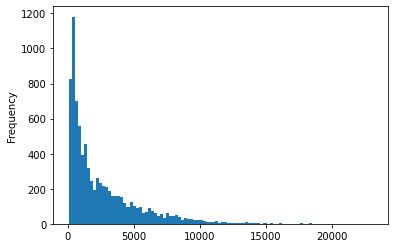

In [102]:
df59_sum["amount"].plot.hist(bins=100)

## P060

---
> P-060: レシート明細データフレーム（df_receipt）の売上金額（amount）を顧客ID（customer_id）ごとに合計し、合計した売上金額を最小値0、最大値1に正規化して顧客ID、売上金額合計とともに表示せよ。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。結果は10件表示させれば良い。

In [103]:
# https://note.nkmk.me/python-list-ndarray-dataframe-normalize-standardize/
from sklearn import preprocessing
# mm = preprocessing.MinMaxScaler()

df60 = df_receipt.copy()
df60 = df60[~df_receipt["customer_id"].str.startswith("Z")]
df60_sum = df60.groupby("customer_id")[["amount"]].sum().reset_index()
df60_sum["mm"] = preprocessing.minmax_scale(df60_sum["amount"])
df60_sum.head(10)

,customer_id,amount,mm
0,CS001113000004,1298,0.053354
1,CS001114000005,626,0.024157
2,CS001115000010,3044,0.129214
3,CS001205000004,1988,0.083333
4,CS001205000006,3337,0.141945
5,CS001211000025,456,0.016771
6,CS001212000027,448,0.016423
7,CS001212000031,296,0.009819
8,CS001212000046,228,0.006865
9,CS001212000070,456,0.016771


## P061

---
> P-061: レシート明細データフレーム（df_receipt）の売上金額（amount）を顧客ID（customer_id）ごとに合計し、合計した売上金額を常用対数化（底=10）して顧客ID、売上金額合計とともに表示せよ。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。結果は10件表示させれば良い。

In [104]:
import numpy
df61 = df_receipt.copy()
df61 = df61[~df_receipt["customer_id"].str.startswith("Z")]
df61_sum = df61.groupby("customer_id")[["amount"]].sum().reset_index()
df61_sum["log10"] = numpy.log10(df61_sum["amount"])
df61_sum.head(10)

,customer_id,amount,log10
0,CS001113000004,1298,3.113275
1,CS001114000005,626,2.796574
2,CS001115000010,3044,3.483445
3,CS001205000004,1988,3.298416
4,CS001205000006,3337,3.523356
5,CS001211000025,456,2.658965
6,CS001212000027,448,2.651278
7,CS001212000031,296,2.471292
8,CS001212000046,228,2.357935
9,CS001212000070,456,2.658965


## P062

---
> P-062: レシート明細データフレーム（df_receipt）の売上金額（amount）を顧客ID（customer_id）ごとに合計し、合計した売上金額を自然対数化(底=e）して顧客ID、売上金額合計とともに表示せよ。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。結果は10件表示させれば良い。

In [105]:
df62 = df_receipt.copy()
df62 = df62[~df_receipt["customer_id"].str.startswith("Z")]
df62_sum = df62.groupby("customer_id")[["amount"]].sum().reset_index()
df62_sum["log"]= np.log(df62_sum["amount"] + 1)
df62_sum.head(10)

,customer_id,amount,log
0,CS001113000004,1298,7.169350
1,CS001114000005,626,6.440947
2,CS001115000010,3044,8.021256
3,CS001205000004,1988,7.595387
4,CS001205000006,3337,8.113127
5,CS001211000025,456,6.124683
6,CS001212000027,448,6.107023
7,CS001212000031,296,5.693732
8,CS001212000046,228,5.433722
9,CS001212000070,456,6.124683


## P063

---
> P-063: 商品データフレーム（df_product）の単価（unit_price）と原価（unit_cost）から、各商品の利益額を算出せよ。結果は10件表示させれば良い。

In [106]:
df63 = df_product.copy()
df63.head()
df63["unit_profit"] = df63["unit_price"] - df63["unit_cost"]
df63.head(10)

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,unit_profit
0,P040101001,4,401,40101,198.0,149.0,49.0
1,P040101002,4,401,40101,218.0,164.0,54.0
2,P040101003,4,401,40101,230.0,173.0,57.0
3,P040101004,4,401,40101,248.0,186.0,62.0
4,P040101005,4,401,40101,268.0,201.0,67.0
5,P040101006,4,401,40101,298.0,224.0,74.0
6,P040101007,4,401,40101,338.0,254.0,84.0
7,P040101008,4,401,40101,420.0,315.0,105.0
8,P040101009,4,401,40101,498.0,374.0,124.0
9,P040101010,4,401,40101,580.0,435.0,145.0


## P064

---
> P-064: 商品データフレーム（df_product）の単価（unit_price）と原価（unit_cost）から、各商品の利益率の全体平均を算出せよ。
ただし、単価と原価にはNULLが存在することに注意せよ。

In [107]:
df64 = df_product.copy()
df64["unit_profit_rate"] = (df64["unit_price"] - df64["unit_cost"])/df64["unit_price"]
df64["unit_profit_rate"].mean(skipna=True)

0.24911389885177

## P065

---
> P-065: 商品データフレーム（df_product）の各商品について、利益率が30%となる新たな単価を求めよ。ただし、1円未満は切り捨てること。そして結果を10件表示させ、利益率がおよそ30％付近であることを確認せよ。ただし、単価（unit_price）と原価（unit_cost）にはNULLが存在することに注意せよ。

In [108]:
df65 = df_product.copy()
df65["new_unit_price"] = df65["unit_cost"]/0.7
df65["new_unit_price"] = df65["new_unit_price"].dropna().astype(int)
df65.head(10)

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,new_unit_price
0,P040101001,4,401,40101,198.0,149.0,212.0
1,P040101002,4,401,40101,218.0,164.0,234.0
2,P040101003,4,401,40101,230.0,173.0,247.0
3,P040101004,4,401,40101,248.0,186.0,265.0
4,P040101005,4,401,40101,268.0,201.0,287.0
5,P040101006,4,401,40101,298.0,224.0,320.0
6,P040101007,4,401,40101,338.0,254.0,362.0
7,P040101008,4,401,40101,420.0,315.0,450.0
8,P040101009,4,401,40101,498.0,374.0,534.0
9,P040101010,4,401,40101,580.0,435.0,621.0


In [109]:
df65["unit_profit_rate"] = (df65["new_unit_price"] - df65["unit_cost"])/df65["new_unit_price"]
df65["unit_profit_rate"].mean(skipna=True)

0.29867844972541435

## P066

---
> P-066: 商品データフレーム（df_product）の各商品について、利益率が30%となる新たな単価を求めよ。今回は、1円未満を四捨五入すること（0.5については偶数方向の丸めで良い）。そして結果を10件表示させ、利益率がおよそ30％付近であることを確認せよ。ただし、単価（unit_price）と原価（unit_cost）にはNULLが存在することに注意せよ。

In [110]:
df66 = df_product.copy()
df66["new_unit_price"] = df66["unit_cost"]/0.7
df66["new_unit_price"] = df66["new_unit_price"].dropna().round().astype(int)
df66.head(10)

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,new_unit_price
0,P040101001,4,401,40101,198.0,149.0,213.0
1,P040101002,4,401,40101,218.0,164.0,234.0
2,P040101003,4,401,40101,230.0,173.0,247.0
3,P040101004,4,401,40101,248.0,186.0,266.0
4,P040101005,4,401,40101,268.0,201.0,287.0
5,P040101006,4,401,40101,298.0,224.0,320.0
6,P040101007,4,401,40101,338.0,254.0,363.0
7,P040101008,4,401,40101,420.0,315.0,450.0
8,P040101009,4,401,40101,498.0,374.0,534.0
9,P040101010,4,401,40101,580.0,435.0,621.0


In [111]:
df66["unit_profit_rate"] = (df66["new_unit_price"] - df66["unit_cost"])/df66["new_unit_price"]
df66["unit_profit_rate"].mean(skipna=True)

0.2999568445636649

↑宿題ここまで2020-12-06

## P067

---
> P-067: 商品データフレーム（df_product）の各商品について、利益率が30%となる新たな単価を求めよ。今回は、1円未満を切り上げること。そして結果を10件表示させ、利益率がおよそ30％付近であることを確認せよ。ただし、単価（unit_price）と原価（unit_cost）にはNULLが存在することに注意せよ。

In [112]:
df67 = df_product.copy()
df67["new_unit_price"] = df67["unit_cost"]/0.7
df67["new_unit_price"] = df67["new_unit_price"].dropna().apply(math.ceil)
# df67["new_unit_price"] = df67["new_unit_price"].dropna()
# df67["new_unit_price"] = numpy.ceil(df67["new_unit_price"])
df67.head(10)

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,new_unit_price
0,P040101001,4,401,40101,198.0,149.0,213.0
1,P040101002,4,401,40101,218.0,164.0,235.0
2,P040101003,4,401,40101,230.0,173.0,248.0
3,P040101004,4,401,40101,248.0,186.0,266.0
4,P040101005,4,401,40101,268.0,201.0,288.0
5,P040101006,4,401,40101,298.0,224.0,320.0
6,P040101007,4,401,40101,338.0,254.0,363.0
7,P040101008,4,401,40101,420.0,315.0,451.0
8,P040101009,4,401,40101,498.0,374.0,535.0
9,P040101010,4,401,40101,580.0,435.0,622.0


In [113]:
df67["unit_profit_rate"] = (df67["new_unit_price"] - df67["unit_cost"])/df67["new_unit_price"]
df67["unit_profit_rate"].mean(skipna=True)

0.30141640305784856

## P068

---
> P-068: 商品データフレーム（df_product）の各商品について、消費税率10%の税込み金額を求めよ。 1円未満の端数は切り捨てとし、結果は10件表示すれば良い。ただし、単価（unit_price）にはNULLが存在することに注意せよ。

In [114]:
import numpy
df68 = df_product.copy()
df68["unit_price_tax"] = df68["unit_price"].dropna() * 1.1
df68["unit_price_tax"] = numpy.floor(df68["unit_price_tax"])
df68.head(10)

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,unit_price_tax
0,P040101001,4,401,40101,198.0,149.0,217.0
1,P040101002,4,401,40101,218.0,164.0,239.0
2,P040101003,4,401,40101,230.0,173.0,253.0
3,P040101004,4,401,40101,248.0,186.0,272.0
4,P040101005,4,401,40101,268.0,201.0,294.0
5,P040101006,4,401,40101,298.0,224.0,327.0
6,P040101007,4,401,40101,338.0,254.0,371.0
7,P040101008,4,401,40101,420.0,315.0,462.0
8,P040101009,4,401,40101,498.0,374.0,547.0
9,P040101010,4,401,40101,580.0,435.0,638.0


## P069

---
> P-069: レシート明細データフレーム（df_receipt）と商品データフレーム（df_product）を結合し、顧客毎に全商品の売上金額合計と、カテゴリ大区分（category_major_cd）が"07"（瓶詰缶詰）の売上金額合計を計算の上、両者の比率を求めよ。抽出対象はカテゴリ大区分"07"（瓶詰缶詰）の購入実績がある顧客のみとし、結果は10件表示させればよい。

In [115]:
df69 = pd.merge(df_receipt, df_product)
df69_customer = df69.groupby("customer_id")["amount"].sum()
df69_07 = df69[df69["category_major_cd"] == 7]
df69_07_customer = df69_07.groupby("customer_id")["amount"].sum()
df69_ans = pd.merge(df69_customer, df69_07_customer, how="inner", on="customer_id")
df69_ans = df69_ans.rename(columns={"amount_x": "amount_all", "amount_y": "amount_70"})
df69_ans["rate"] = df69_ans["amount_70"]/df69_ans["amount_all"]
df69_ans.head(10)

,amount_all,amount_70,rate
customer_id,,,
CS001113000004,1298,1298,1.000000
CS001114000005,626,486,0.776358
CS001115000010,3044,2694,0.885020
CS001205000004,1988,346,0.174044
CS001205000006,3337,2004,0.600539
CS001212000027,448,200,0.446429
CS001212000031,296,296,1.000000
CS001212000046,228,108,0.473684
CS001212000070,456,308,0.675439


## P070

---
> P-070: レシート明細データフレーム（df_receipt）の売上日（sales_ymd）に対し、顧客データフレーム（df_customer）の会員申込日（application_date）からの経過日数を計算し、顧客ID（customer_id）、売上日、会員申込日とともに表示せよ。結果は10件表示させれば良い（なお、sales_ymdは数値、application_dateは文字列でデータを保持している点に注意）。

In [116]:
df70 = pd.merge(df_receipt,df_customer)[["customer_id", "sales_ymd", "application_date"]]
df70["x"] = pd.to_datetime(df70["sales_ymd"].astype(str))
df70["y"] = pd.to_datetime(df70["application_date"].astype(str))
df70["days"] = df70["x"] - df70["y"]
df70 = df70[["customer_id", "sales_ymd", "application_date", "days"]]
df70.head(10)

,customer_id,sales_ymd,application_date,days
0,CS006214000001,20181103,20150201,1371 days
1,CS006214000001,20170509,20150201,828 days
2,CS006214000001,20170608,20150201,858 days
3,CS006214000001,20170608,20150201,858 days
4,CS006214000001,20181028,20150201,1365 days
5,CS006214000001,20181028,20150201,1365 days
6,CS006214000001,20170509,20150201,828 days
7,CS006214000001,20190908,20150201,1680 days
8,CS006214000001,20180131,20150201,1095 days
9,CS006214000001,20170705,20150201,885 days


## P071

---
> P-071: レシート明細データフレーム（df_receipt）の売上日（sales_ymd）に対し、顧客データフレーム（df_customer）の会員申込日（application_date）からの経過月数を計算し、顧客ID（customer_id）、売上日、会員申込日とともに表示せよ。結果は10件表示させれば良い（なお、sales_ymdは数値、application_dateは文字列でデータを保持している点に注意）。1ヶ月未満は切り捨てること。

In [117]:
df71 = pd.merge(df_receipt,df_customer)[["customer_id", "sales_ymd", "application_date"]]
df71["x"] = pd.to_datetime(df71["sales_ymd"].astype(str))
df71["y"] = pd.to_datetime(df71["application_date"].astype(str))
df71["days"] = df71["x"] - df71["y"]
df71["months"] = df71["days"] // np.timedelta64(1, 'M')
df71 = df71[["customer_id", "sales_ymd", "application_date", "months"]]
df71.head(10)

,customer_id,sales_ymd,application_date,months
0,CS006214000001,20181103,20150201,45
1,CS006214000001,20170509,20150201,27
2,CS006214000001,20170608,20150201,28
3,CS006214000001,20170608,20150201,28
4,CS006214000001,20181028,20150201,44
5,CS006214000001,20181028,20150201,44
6,CS006214000001,20170509,20150201,27
7,CS006214000001,20190908,20150201,55
8,CS006214000001,20180131,20150201,35
9,CS006214000001,20170705,20150201,29


## P072

---
> P-072: レシート明細データフレーム（df_receipt）の売上日（sales_ymd）に対し、顧客データフレーム（df_customer）の会員申込日（application_date）からの経過年数を計算し、顧客ID（customer_id）、売上日、会員申込日とともに表示せよ。結果は10件表示させれば良い。（なお、sales_ymdは数値、application_dateは文字列でデータを保持している点に注意）。1年未満は切り捨てること。

In [118]:
df72 = pd.merge(df_receipt,df_customer)[["customer_id", "sales_ymd", "application_date"]]
df72["x"] = pd.to_datetime(df72["sales_ymd"].astype(str))
df72["y"] = pd.to_datetime(df72["application_date"].astype(str))
df72["days"] = df72["x"] - df72["y"]
df72["years"] = df72["days"] // np.timedelta64(1, 'Y')
df72 = df72[["customer_id", "sales_ymd", "application_date", "years"]]
df72.head(10)

,customer_id,sales_ymd,application_date,years
0,CS006214000001,20181103,20150201,3
1,CS006214000001,20170509,20150201,2
2,CS006214000001,20170608,20150201,2
3,CS006214000001,20170608,20150201,2
4,CS006214000001,20181028,20150201,3
5,CS006214000001,20181028,20150201,3
6,CS006214000001,20170509,20150201,2
7,CS006214000001,20190908,20150201,4
8,CS006214000001,20180131,20150201,2
9,CS006214000001,20170705,20150201,2


## P073

---
> P-073: レシート明細データフレーム（df_receipt）の売上日（sales_ymd）に対し、顧客データフレーム（df_customer）の会員申込日（application_date）からのエポック秒による経過時間を計算し、顧客ID（customer_id）、売上日、会員申込日とともに表示せよ。結果は10件表示させれば良い（なお、sales_ymdは数値、application_dateは文字列でデータを保持している点に注意）。なお、時間情報は保有していないため各日付は0時0分0秒を表すものとする。

In [119]:
df73 = pd.merge(df_receipt,df_customer)[["customer_id", "sales_ymd", "application_date"]]
df73["x"] = pd.to_datetime(df73["sales_ymd"].astype(str))
df73["y"] = pd.to_datetime(df73["application_date"].astype(str))
df73["days"] = df73["x"] - df73["y"]
df73["milliseconds"] = df73["days"] // pd.Timedelta("1ms")
df73 = df73[["customer_id", "sales_ymd", "application_date", "milliseconds"]]
df73.head(10)

,customer_id,sales_ymd,application_date,milliseconds
0,CS006214000001,20181103,20150201,118454400000
1,CS006214000001,20170509,20150201,71539200000
2,CS006214000001,20170608,20150201,74131200000
3,CS006214000001,20170608,20150201,74131200000
4,CS006214000001,20181028,20150201,117936000000
5,CS006214000001,20181028,20150201,117936000000
6,CS006214000001,20170509,20150201,71539200000
7,CS006214000001,20190908,20150201,145152000000
8,CS006214000001,20180131,20150201,94608000000
9,CS006214000001,20170705,20150201,76464000000


## P074

---
> P-074: レシート明細データフレーム（df_receipt）の売上日（sales_ymd）に対し、当該週の月曜日からの経過日数を計算し、売上日、当該週の月曜日付とともに表示せよ。結果は10件表示させれば良い（なお、sales_ymdは数値でデータを保持している点に注意）。

In [120]:
from datetime import timedelta
def get_monday(x):
    w = x.weekday()
    return x - timedelta(days=w)

In [121]:
df74 = df_receipt.copy()
df74["sales_date"] = pd.to_datetime(df74["sales_ymd"].astype(str))
df74["monday"] = df74["sales_date"].apply(get_monday)
df74["w"] = df74["sales_date"].dt.weekday
df74 = df74[["sales_ymd","w", "monday"]]
df74.head(10)

,sales_ymd,w,monday
0,20181103,5,2018-10-29
1,20181118,6,2018-11-12
2,20170712,2,2017-07-10
3,20190205,1,2019-02-04
4,20180821,1,2018-08-20
5,20190605,2,2019-06-03
6,20181205,2,2018-12-03
7,20190922,6,2019-09-16
8,20170504,3,2017-05-01
9,20191010,3,2019-10-07


## P075

---
> P-075: 顧客データフレーム（df_customer）からランダムに1%のデータを抽出し、先頭から10件データを抽出せよ。

In [122]:
# https://note.nkmk.me/python-pandas-sample/
df75 = df_customer.copy()
df75.sample(frac=0.01).head(10)

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
16074,CS034513000196,本田 はるみ,1,女性,1967-06-08,51,216-0003,神奈川県川崎市宮前区有馬**********,S14034,20150804,4-20090531-4
6397,CS016113000008,根本 恵子,1,女性,1999-10-21,19,183-0002,東京都府中市多磨町**********,S13016,20161012,6-20090720-3
749,CS010512000107,平塚 育子,1,女性,1960-10-26,58,222-0002,神奈川県横浜市港北区師岡町**********,S14010,20150207,0-00000000-0
14431,CS034502000022,桜田 サンタマリア,0,男性,1961-08-19,57,213-0024,神奈川県川崎市高津区明津**********,S14034,20150519,0-00000000-0
21777,CS007312000119,田村 未華子,1,女性,1986-07-29,32,276-0023,千葉県八千代市勝田台**********,S12007,20150416,0-00000000-0
11601,CS032211000003,内田 さとみ,9,不明,1991-04-10,27,143-0026,東京都大田区西馬込**********,S13032,20150527,0-00000000-0
5305,CS040412000209,ともさか 彩華,1,女性,1970-04-20,48,226-0018,神奈川県横浜市緑区長津田みなみ台**********,S14040,20151213,0-00000000-0
18679,CS039314000077,二宮 かおり,1,女性,1986-07-14,32,167-0052,東京都杉並区南荻窪**********,S13039,20150618,A-20100518-6
10853,CS024414000099,石井 紗季,9,不明,1972-12-27,46,214-0035,神奈川県川崎市多摩区長沢**********,S14024,20150616,F-20100806-F
7290,CS014803000002,中里 栄一,0,男性,1936-01-08,83,263-0015,千葉県千葉市稲毛区作草部**********,S12014,20160529,3-20080603-3


## P076

---
> P-076: 顧客データフレーム（df_customer）から性別（gender_cd）の割合に基づきランダムに10%のデータを層化抽出データし、性別ごとに件数を集計せよ。

In [123]:
df76 = df_customer.copy()
df76_10 = df76.sample(frac=0.1)
df76_10_ans = df76_10.groupby("gender_cd")[["customer_id"]].count()
df76_10_ans

,customer_id
gender_cd,
0,308
1,1784
9,105


In [124]:
df76 = df_customer.copy()
# all_count = df76["customer_id"].count()
count_1,count_0,count_9 = df76["gender_cd"].value_counts(normalize=True)
print(count_1,count_0,count_9)

0.8155295616949615 0.13567884939238087 0.04879158891265759


## P077

---
> P-077: レシート明細データフレーム（df_receipt）の売上金額（amount）を顧客単位に合計し、合計した売上金額の外れ値を抽出せよ。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。なお、ここでは外れ値を平均から3σ以上離れたものとする。結果は10件表示させれば良い。

In [125]:
# https://mathwords.net/sigumakukan
df77 = df_receipt.copy()
df77 = df77[~df77["customer_id"].str.startswith("Z")]
df77_sum = df77.groupby("customer_id")[["amount"]].sum()

df77_average = np.mean(df77_sum["amount"])
df77_sd = np.std(df77_sum["amount"])

# 外れ値の基準点
outlier_min = df77_average - (df77_sd) * 3
outlier_max = df77_average + (df77_sd) * 3

df77_sum[(df77_sum["amount"] <= outlier_min) | (df77_sum["amount"] >= outlier_max)].head(10)

,amount
customer_id,
CS001605000009,18925
CS006415000147,12723
CS006515000023,18372
CS006515000125,12575
CS006515000209,11373
CS007115000006,11528
CS007514000056,13293
CS007514000094,15735
CS007515000107,11188


<AxesSubplot:ylabel='Frequency'>

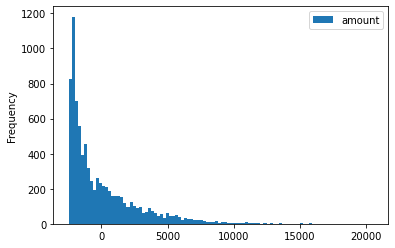

In [126]:
(df77_sum - df77_average).plot(kind="hist", bins=100)

↑宿題ここまで2020-12-20

## P078

---
> P-078: レシート明細データフレーム（df_receipt）の売上金額（amount）を顧客単位に合計し、合計した売上金額の外れ値を抽出せよ。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。なお、ここでは外れ値を第一四分位と第三四分位の差であるIQRを用いて、「第一四分位数-1.5×IQR」よりも下回るもの、または「第三四分位数+1.5×IQR」を超えるものとする。結果は10件表示させれば良い。

In [127]:
df78 = df_receipt.copy()
df78 = df78[~df78["customer_id"].str.startswith("Z")]
df78_sum = df78.groupby("customer_id")[["amount"]].sum()

# 四分位
qt = df78.quantile([0, 0.25, 0.5, 0.75, 1.0])
qt

,sales_ymd,sales_epoch,receipt_no,receipt_sub_no,quantity,amount
0.00,20170101.0,1.483229e+09,112.0,1.0,1.0,10.0
0.25,20170919.0,1.505779e+09,1112.0,1.0,1.0,102.0
0.50,20180611.0,1.528675e+09,1142.0,1.5,1.0,170.0
0.75,20190224.0,1.550966e+09,1172.0,2.0,1.0,288.0
1.00,20191031.0,1.572480e+09,1640.0,2.0,8.0,10925.0


In [128]:
iqr = qt["amount"][0.75] - qt["amount"][0.25]
iqr

186.0

In [129]:
q1 = qt["amount"][0.25] - 1.5*iqr
q3 = qt["amount"][0.75] + 1.5*iqr

df78_sum[(df78_sum["amount"] < q1) | (df78_sum["amount"] > q3)].head(10)

,amount
customer_id,
CS001113000004,1298
CS001114000005,626
CS001115000010,3044
CS001205000004,1988
CS001205000006,3337
CS001214000009,4685
CS001214000017,4132
CS001214000048,2374
CS001214000052,5639


## P079

---
> P-079: 商品データフレーム（df_product）の各項目に対し、欠損数を確認せよ。

In [130]:
df79 = df_product.copy()
df79.isnull().sum()

product_cd            0
category_major_cd     0
category_medium_cd    0
category_small_cd     0
unit_price            7
unit_cost             7
dtype: int64

In [131]:
df79.isnull().value_counts()

product_cd  category_major_cd  category_medium_cd  category_small_cd  unit_price  unit_cost
False       False              False               False              False       False        10023
                                                                      True        True             7
dtype: int64

## P080

---
> P-080: 商品データフレーム（df_product）のいずれかの項目に欠損が発生しているレコードを全て削除した新たなdf_product_1を作成せよ。なお、削除前後の件数を表示させ、前設問で確認した件数だけ減少していることも確認すること。

In [132]:
df80 = df_product.copy()
df80.count()

product_cd            10030
category_major_cd     10030
category_medium_cd    10030
category_small_cd     10030
unit_price            10023
unit_cost             10023
dtype: int64

In [133]:
df_product_1 = df80.dropna()
df_product_1.count()

product_cd            10023
category_major_cd     10023
category_medium_cd    10023
category_small_cd     10023
unit_price            10023
unit_cost             10023
dtype: int64

## P081

---
> P-081: 単価（unit_price）と原価（unit_cost）の欠損値について、それぞれの平均値で補完した新たなdf_product_2を作成せよ。なお、平均値について1円未満は四捨五入とし、0.5については偶数寄せでかまわない。補完実施後、各項目について欠損が生じていないことも確認すること。

In [134]:
df81 = df_product.copy()
up = df81["unit_price"].dropna().mean().round().astype(int)
uc = df81["unit_cost"].dropna().mean().round().astype(int)

df_product_2 = df81.fillna({"unit_price": up, "unit_cost": uc})
df_product_2.head()

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost
0,P040101001,4,401,40101,198.0,149.0
1,P040101002,4,401,40101,218.0,164.0
2,P040101003,4,401,40101,230.0,173.0
3,P040101004,4,401,40101,248.0,186.0
4,P040101005,4,401,40101,268.0,201.0


In [135]:
df_product_2.count()

product_cd            10030
category_major_cd     10030
category_medium_cd    10030
category_small_cd     10030
unit_price            10030
unit_cost             10030
dtype: int64

In [136]:
up = df81["unit_price"].mean(skipna=True).round().astype(int)
uc = df81["unit_cost"].mean(skipna=True).round().astype(int)
print(up,uc)

403 302


In [137]:
df81_2 = df_product.copy()
df81_2["unit_price"].mean(skipna=True).round()
#df81_2.info()

403.0

In [138]:
pd.__version__

'1.1.4'

In [139]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 67a3d4241ab84419856b84fc3ebc9abcbe66c6b3
python           : 3.8.0.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.4.0-19041-Microsoft
Version          : #488-Microsoft Mon Sep 01 13:43:00 PST 2020
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : C.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.4
numpy            : 1.19.4
pytz             : 2020.4
dateutil         : 2.8.1
pip              : 20.3.3
setuptools       : 39.0.1
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.19.0
pandas_datareader: None
bs4              : None
bottleneck       : None
fsspec        

## P082

---
> P-082: 単価（unit_price）と原価（unit_cost）の欠損値について、それぞれの中央値で補完した新たなdf_product_3を作成せよ。なお、中央値について1円未満は四捨五入とし、0.5については偶数寄せでかまわない。補完実施後、各項目について欠損が生じていないことも確認すること。

In [140]:
df82 = df_product.copy()
up = df82["unit_price"].dropna().median().round().astype(int)
uc = df82["unit_cost"].dropna().median().round().astype(int)

df_product_3 = df82.fillna({"unit_price": up, "unit_cost": uc})
df_product_3.head()

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost
0,P040101001,4,401,40101,198.0,149.0
1,P040101002,4,401,40101,218.0,164.0
2,P040101003,4,401,40101,230.0,173.0
3,P040101004,4,401,40101,248.0,186.0
4,P040101005,4,401,40101,268.0,201.0


In [141]:
df_product_3.count()

product_cd            10030
category_major_cd     10030
category_medium_cd    10030
category_small_cd     10030
unit_price            10030
unit_cost             10030
dtype: int64

## P083

---
> P-083: 単価（unit_price）と原価（unit_cost）の欠損値について、各商品の小区分（category_small_cd）ごとに算出した中央値で補完した新たなdf_product_4を作成せよ。なお、中央値について1円未満は四捨五入とし、0.5については偶数寄せでかまわない。補完実施後、各項目について欠損が生じていないことも確認すること。

In [142]:
df83 = df_product.copy()
df83_2 = df83.groupby("category_small_cd")[["unit_price", "unit_cost"]].median().round().astype(int).reset_index()
df83_2.head()

,category_small_cd,unit_price,unit_cost
0,40101,283,212
1,40102,378,284
2,40201,223,168
3,40202,178,134
4,40203,308,231


In [143]:
df83_merge = pd.merge(df83, df83_2,on="category_small_cd")
df83_merge.head()

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price_x,unit_cost_x,unit_price_y,unit_cost_y
0,P040101001,4,401,40101,198.0,149.0,283,212
1,P040101002,4,401,40101,218.0,164.0,283,212
2,P040101003,4,401,40101,230.0,173.0,283,212
3,P040101004,4,401,40101,248.0,186.0,283,212
4,P040101005,4,401,40101,268.0,201.0,283,212


In [144]:
df83_merge["unit_price"] = df83_merge["unit_price_x"].mask(df83_merge["unit_price_x"].isnull(), df83_merge["unit_price_y"])
df83_merge["unit_price"]

0         198.0
1         218.0
2         230.0
3         248.0
4         268.0
          ...  
10025     280.0
10026     680.0
10027    1080.0
10028    1130.0
10029    1280.0
Name: unit_price, Length: 10030, dtype: float64

In [145]:
df83_merge["unit_cost"] = df83_merge["unit_cost_x"].mask(df83_merge["unit_cost_x"].isnull(), df83_merge["unit_cost_y"])
df83_merge["unit_cost"]
df83_merge.head()

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price_x,unit_cost_x,unit_price_y,unit_cost_y,unit_price,unit_cost
0,P040101001,4,401,40101,198.0,149.0,283,212,198.0,149.0
1,P040101002,4,401,40101,218.0,164.0,283,212,218.0,164.0
2,P040101003,4,401,40101,230.0,173.0,283,212,230.0,173.0
3,P040101004,4,401,40101,248.0,186.0,283,212,248.0,186.0
4,P040101005,4,401,40101,268.0,201.0,283,212,268.0,201.0


In [146]:
df_product_4 = df83_merge[["product_cd", "category_major_cd", "category_medium_cd", "category_small_cd",
                          "unit_price", "unit_cost"]]
df_product_4.count()

product_cd            10030
category_major_cd     10030
category_medium_cd    10030
category_small_cd     10030
unit_price            10030
unit_cost             10030
dtype: int64

## P084

---
> P-084: 顧客データフレーム（df_customer）の全顧客に対し、全期間の売上金額に占める2019年売上金額の割合を計算せよ。ただし、販売実績のない場合は0として扱うこと。そして計算した割合が0超のものを抽出せよ。 結果は10件表示させれば良い。また、作成したデータにNAやNANが存在しないことを確認せよ。

In [147]:
df84_r = df_receipt.copy()
df84_r_sum = df84_r.groupby("customer_id")[["amount"]].sum().reset_index()
df84_r_sum.head()

,customer_id,amount
0,CS001113000004,1298
1,CS001114000005,626
2,CS001115000010,3044
3,CS001205000004,1988
4,CS001205000006,3337


In [148]:
df84_r_2019 = df_receipt[(df_receipt["sales_ymd"] >= 20190101) & (df_receipt["sales_ymd"] <= 20191231)]
df84_r_2019_sum = df84_r_2019.groupby("customer_id")[["amount"]].sum().reset_index()
df84_r_2019_sum.columns = ["customer_id", "amount_2019"]
df84_r_2019_sum.head()

,customer_id,amount_2019
0,CS001113000004,1298
1,CS001114000005,188
2,CS001115000010,578
3,CS001205000004,702
4,CS001205000006,486


In [149]:
df84 = pd.merge(df_customer[["customer_id"]], df84_r_sum, how="left")
df84 = pd.merge(df84, df84_r_2019_sum, how="left")
df84["rate_2019"] = df84["amount_2019"] / df84["amount"]
df84 = df84.fillna(0)
df84.head()

,customer_id,amount,amount_2019,rate_2019
0,CS021313000114,0.0,0.0,0.000000
1,CS037613000071,0.0,0.0,0.000000
2,CS031415000172,5088.0,2971.0,0.583923
3,CS028811000001,0.0,0.0,0.000000
4,CS001215000145,875.0,0.0,0.000000


In [150]:
df84[df84["rate_2019"] > 0].head(10)

,customer_id,amount,amount_2019,rate_2019
2,CS031415000172,5088.0,2971.0,0.583923
6,CS015414000103,3122.0,874.0,0.279949
12,CS011215000048,3444.0,248.0,0.072009
15,CS029415000023,5167.0,3767.0,0.729050
21,CS035415000029,7504.0,5823.0,0.775986
23,CS023513000066,771.0,208.0,0.269780
24,CS035513000134,1565.0,463.0,0.295847
27,CS001515000263,216.0,216.0,1.000000
30,CS006415000279,229.0,229.0,1.000000
32,CS031415000106,7741.0,215.0,0.027774


In [151]:
df84.isnull().sum()

customer_id    0
amount         0
amount_2019    0
rate_2019      0
dtype: int64

## P085

---
> P-085: 顧客データフレーム（df_customer）の全顧客に対し、郵便番号（postal_cd）を用いて経度緯度変換用データフレーム（df_geocode）を紐付け、新たなdf_customer_1を作成せよ。ただし、複数紐づく場合は経度（longitude）、緯度（latitude）それぞれ平均を算出すること。


In [152]:
df85_g = df_geocode.groupby("postal_cd").mean().reset_index()
df85_g.head()

,postal_cd,longitude,latitude
0,001-0000,141.340380,43.090540
1,001-0010,141.350532,43.073257
2,001-0011,141.350248,43.074407
3,001-0012,141.349950,43.075545
4,001-0013,141.349655,43.076695


In [153]:
df_customer_1 = pd.merge(df_customer,df85_g,on="postal_cd", how="left")
df_customer_1.head()

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd,longitude,latitude
0,CS021313000114,大野 あや子,1,女性,1981-04-29,37,259-1113,神奈川県伊勢原市粟窪**********,S14021,20150905,0-00000000-0,139.31779,35.41358
1,CS037613000071,六角 雅彦,9,不明,1952-04-01,66,136-0076,東京都江東区南砂**********,S13037,20150414,0-00000000-0,139.83502,35.67193
2,CS031415000172,宇多田 貴美子,1,女性,1976-10-04,42,151-0053,東京都渋谷区代々木**********,S13031,20150529,D-20100325-C,139.68965,35.67374
3,CS028811000001,堀井 かおり,1,女性,1933-03-27,86,245-0016,神奈川県横浜市泉区和泉町**********,S14028,20160115,0-00000000-0,139.48360,35.39125
4,CS001215000145,田崎 美紀,1,女性,1995-03-29,24,144-0055,東京都大田区仲六郷**********,S13001,20170605,6-20090929-2,139.70775,35.54084


## P086

---
> P-086: 前設問で作成した緯度経度つき顧客データフレーム（df_customer_1）に対し、申込み店舗コード（application_store_cd）をキーに店舗データフレーム（df_store）と結合せよ。そして申込み店舗の緯度（latitude）・経度情報（longitude)と顧客の緯度・経度を用いて距離（km）を求め、顧客ID（customer_id）、顧客住所（address）、店舗住所（address）とともに表示せよ。計算式は簡易式で良いものとするが、その他精度の高い方式を利用したライブラリを利用してもかまわない。結果は10件表示すれば良い。

$$
緯度（ラジアン）：\phi \\
経度（ラジアン）：\lambda \\
距離L = 6371 * arccos(sin \phi_1 * sin \phi_2
+ cos \phi_1 * cos \phi_2 * cos(\lambda_1 − \lambda_2))
$$

In [154]:
#df_store.head()

In [155]:
df86 = pd.merge(df_customer_1, df_store, left_on="application_store_cd",right_on="store_cd", how="left")
df86_ans = df86[["customer_id", "address_x","longitude_x", "latitude_x", "address_y","longitude_y", "latitude_y"]]
# https://note.nkmk.me/python-numpy-sin-con-tan/
latitude_x = np.radians(df86_ans["latitude_x"])
latitude_y = np.radians(df86_ans["latitude_y"])
longitude_x = np.radians(df86_ans["longitude_x"])
longitude_y = np.radians(df86_ans["longitude_y"])
# https://note.nkmk.me/python-pandas-setting-with-copy-warning/
df86_ans["distance"] = 6371*np.arccos(np.sin(latitude_x) * np.sin(latitude_y) 
                                      + np.cos(latitude_x)* np.cos(latitude_y) * np.cos(longitude_x - longitude_y))
df86_ans.head(10)

<ipython-input-155-e6c40d821eaa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df86_ans["distance"] = 6371*np.arccos(np.sin(latitude_x) * np.sin(latitude_y)


,customer_id,address_x,longitude_x,latitude_x,address_y,longitude_y,latitude_y,distance
0,CS021313000114,神奈川県伊勢原市粟窪**********,139.31779,35.41358,神奈川県伊勢原市伊勢原四丁目,139.3129,35.40169,1.394409
1,CS037613000071,東京都江東区南砂**********,139.83502,35.67193,東京都江東区南砂一丁目,139.8215,35.67898,1.451182
2,CS031415000172,東京都渋谷区代々木**********,139.68965,35.67374,東京都渋谷区初台二丁目,139.6862,35.67616,0.411733
3,CS028811000001,神奈川県横浜市泉区和泉町**********,139.48360,35.39125,神奈川県横浜市瀬谷区二ツ橋町,139.4963,35.46304,8.065196
4,CS001215000145,東京都大田区仲六郷**********,139.70775,35.54084,東京都大田区仲六郷二丁目,139.7132,35.55135,1.268421
5,CS020401000016,東京都板橋区若木**********,139.67245,35.77073,東京都北区十条仲原三丁目,139.7186,35.76686,4.185905
6,CS015414000103,東京都江東区北砂**********,139.83601,35.67818,東京都江東区南砂二丁目,139.8229,35.67066,1.449673
7,CS029403000008,千葉県浦安市海楽**********,139.90469,35.65422,千葉県浦安市東野一丁目,139.8968,35.65086,0.804858
8,CS015804000004,東京都江東区北砂**********,139.83601,35.67818,東京都江東区南砂二丁目,139.8229,35.67066,1.449673
9,CS033513000180,神奈川県横浜市旭区善部町**********,139.51463,35.45013,神奈川県横浜市瀬谷区阿久和西一丁目,139.4961,35.45918,1.956947


## P087

---
> P-087:  顧客データフレーム（df_customer）では、異なる店舗での申込みなどにより同一顧客が複数登録されている。名前（customer_name）と郵便番号（postal_cd）が同じ顧客は同一顧客とみなし、1顧客1レコードとなるように名寄せした名寄顧客データフレーム（df_customer_u）を作成せよ。ただし、同一顧客に対しては売上金額合計が最も高いものを残すものとし、売上金額合計が同一もしくは売上実績の無い顧客については顧客ID（customer_id）の番号が小さいものを残すこととする。

In [156]:
df87 = df_customer.copy()
df87_r = df_receipt.groupby("customer_id")[["amount"]].sum().reset_index()
df87_r.head()

,customer_id,amount
0,CS001113000004,1298
1,CS001114000005,626
2,CS001115000010,3044
3,CS001205000004,1988
4,CS001205000006,3337


In [157]:
# https://note.nkmk.me/python-pandas-sort-values-sort-index/
df_customer_u = pd.merge(df_customer, df87_r, on="customer_id",how="left").fillna(0).sort_values(["amount", "customer_id"],ascending=[False, True])
# https://note.nkmk.me/python-pandas-duplicated-drop-duplicates/
df_customer_u = df_customer_u.drop_duplicates(subset=["customer_name", "postal_cd"], keep="first")
df_customer_u.head()

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd,amount
16905,CS017415000097,福士 千夏,1,女性,1973-04-03,45,166-0014,東京都杉並区松ノ木**********,S13017,20151209,F-20101006-F,23086.0
12692,CS015415000185,岩淵 はるみ,1,女性,1973-09-19,45,135-0043,東京都江東区塩浜**********,S13015,20150322,F-20101014-F,20153.0
13550,CS031414000051,長澤 沙知絵,1,女性,1973-04-25,45,151-0064,東京都渋谷区上原**********,S13031,20150823,F-20101009-F,19202.0
4808,CS028415000007,紺野 あい,1,女性,1969-07-28,49,246-0023,神奈川県横浜市瀬谷区阿久和東**********,S14028,20151212,F-20100922-F,19127.0
14205,CS001605000009,安部 耕司,0,男性,1952-10-22,66,144-0035,東京都大田区南蒲田**********,S13001,20160203,F-20101019-E,18925.0


## P088

---
> P-088: 前設問で作成したデータを元に、顧客データフレームに統合名寄IDを付与したデータフレーム（df_customer_n）を作成せよ。ただし、統合名寄IDは以下の仕様で付与するものとする。
>
> - 重複していない顧客：顧客ID（customer_id）を設定
> - 重複している顧客：前設問で抽出したレコードの顧客IDを設定

In [158]:
df_customer_n_tmp = pd.merge(df_customer, df_customer_u, how="left", on=["customer_name", "postal_cd"])
df_customer_n = df_customer_n_tmp[["customer_id_x","customer_id_y", "customer_name", "postal_cd"]]
df_customer_n.head(10)

,customer_id_x,customer_id_y,customer_name,postal_cd
0,CS021313000114,CS021313000114,大野 あや子,259-1113
1,CS037613000071,CS037613000071,六角 雅彦,136-0076
2,CS031415000172,CS031415000172,宇多田 貴美子,151-0053
3,CS028811000001,CS028811000001,堀井 かおり,245-0016
4,CS001215000145,CS001215000145,田崎 美紀,144-0055
5,CS020401000016,CS020401000016,宮下 達士,174-0065
6,CS015414000103,CS015414000103,奥野 陽子,136-0073
7,CS029403000008,CS029403000008,釈 人志,279-0003
8,CS015804000004,CS015804000004,松谷 米蔵,136-0073
9,CS033513000180,CS033513000180,安斎 遥,241-0823


---
> P-閑話: df_customer_1, df_customer_nは使わないので削除する。

## P089

---
> P-089: 売上実績のある顧客に対し、予測モデル構築のため学習用データとテスト用データに分割したい。それぞれ8:2の割合でランダムにデータを分割せよ。

In [159]:
from sklearn.model_selection import train_test_split

df89 = pd.merge(df_customer, df_receipt['customer_id'], how='inner', on='customer_id')
df89_train, df89_test = train_test_split(df89, test_size=0.2, random_state=71)
print(len(df89_train), len(df89_test))

52545 13137


In [160]:
df_train, df_test = train_test_split(df_customer_u.query("amount>0"), test_size=0.2)
print(len(df89_train), len(df89_test))

52545 13137


↑宿題ここまで

## P090

---
> P-090: レシート明細データフレーム（df_receipt）は2017年1月1日〜2019年10月31日までのデータを有している。売上金額（amount）を月次で集計し、学習用に12ヶ月、テスト用に6ヶ月のモデル構築用データを3セット作成せよ。

In [171]:
df90 = df_receipt.copy()
df90["sales_ymd_to"] = pd.to_datetime(df90["sales_ymd"], format="%Y%m%d")
df90["sales_ym"] = df90["sales_ymd_to"].dt.strftime("%Y%m")
df90_m = df90.groupby("sales_ym")[["amount"]].sum().reset_index()
df90_m.head()

,sales_ym,amount
0,201701,902056
1,201702,764413
2,201703,962945
3,201704,847566
4,201705,884010


In [172]:
# 問題の意味が分からない
# どう分けたらいいの？

## P091

---
> P-091: 顧客データフレーム（df_customer）の各顧客に対し、売上実績のある顧客数と売上実績のない顧客数が1:1となるようにアンダーサンプリングで抽出せよ。

In [ ]:
# アンダーサンプリングとは？
# アンダーサンプリングとは、少数派のデータ件数に合うように多数派データからランダムに抽出する方法です。
# https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92#%E3%82%A2%E3%83%B3%E3%83%80%E3%83%BC%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AA%E3%83%B3%E3%82%B0

In [23]:
df91_r = df_receipt.groupby("customer_id")[["amount"]].sum().reset_index()
df91 = pd.merge(df_customer , df91_r, on="customer_id", how="left").fillna(0)
df91["sales_flg"] = df91["amount"].apply(lambda x: 0 if x == 0 else 1) 
df91.head()

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd,amount,sales_flg
0,CS021313000114,大野 あや子,1,女性,1981-04-29,37,259-1113,神奈川県伊勢原市粟窪**********,S14021,20150905,0-00000000-0,0.0,0
1,CS037613000071,六角 雅彦,9,不明,1952-04-01,66,136-0076,東京都江東区南砂**********,S13037,20150414,0-00000000-0,0.0,0
2,CS031415000172,宇多田 貴美子,1,女性,1976-10-04,42,151-0053,東京都渋谷区代々木**********,S13031,20150529,D-20100325-C,5088.0,1
3,CS028811000001,堀井 かおり,1,女性,1933-03-27,86,245-0016,神奈川県横浜市泉区和泉町**********,S14028,20160115,0-00000000-0,0.0,0
4,CS001215000145,田崎 美紀,1,女性,1995-03-29,24,144-0055,東京都大田区仲六郷**********,S13001,20170605,6-20090929-2,875.0,1


In [24]:
x = df91[df91["sales_flg"] == 1]
y = df91[df91["sales_flg"] == 0]
print(len(x), len(y))

8306 13665


In [25]:
# https://pypi.org/project/imbalanced-learn/
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_res, y_res = rus.fit_resample(df91, df91.sales_flg)
print(len(x_res), len(y_res))

16612 16612


## P092

---
> P-092: 顧客データフレーム（df_customer）では、性別に関する情報が非正規化の状態で保持されている。これを第三正規化せよ。

In [27]:
df92 = df_customer.copy()
df92_gender = df92[["gender_cd", "gender"]].drop_duplicates()
df92_gender

,gender_cd,gender
0,1,女性
1,9,不明
5,0,男性


In [28]:
df92_2 = df92.drop(columns="gender")
df92_2.head()

,customer_id,customer_name,gender_cd,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
0,CS021313000114,大野 あや子,1,1981-04-29,37,259-1113,神奈川県伊勢原市粟窪**********,S14021,20150905,0-00000000-0
1,CS037613000071,六角 雅彦,9,1952-04-01,66,136-0076,東京都江東区南砂**********,S13037,20150414,0-00000000-0
2,CS031415000172,宇多田 貴美子,1,1976-10-04,42,151-0053,東京都渋谷区代々木**********,S13031,20150529,D-20100325-C
3,CS028811000001,堀井 かおり,1,1933-03-27,86,245-0016,神奈川県横浜市泉区和泉町**********,S14028,20160115,0-00000000-0
4,CS001215000145,田崎 美紀,1,1995-03-29,24,144-0055,東京都大田区仲六郷**********,S13001,20170605,6-20090929-2


## P093

---
> P-093: 商品データフレーム（df_product）では各カテゴリのコード値だけを保有し、カテゴリ名は保有していない。カテゴリデータフレーム（df_category）と組み合わせて非正規化し、カテゴリ名を保有した新たな商品データフレームを作成せよ。

In [29]:
df_product.head()

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost
0,P040101001,4,401,40101,198.0,149.0
1,P040101002,4,401,40101,218.0,164.0
2,P040101003,4,401,40101,230.0,173.0
3,P040101004,4,401,40101,248.0,186.0
4,P040101005,4,401,40101,268.0,201.0


In [30]:
df_category.head()

,category_major_cd,category_major_name,category_medium_cd,category_medium_name,category_small_cd,category_small_name
0,4,惣菜,401,御飯類,40101,弁当類
1,4,惣菜,401,御飯類,40102,寿司類
2,4,惣菜,402,佃煮類,40201,魚介佃煮類
3,4,惣菜,402,佃煮類,40202,海草佃煮類
4,4,惣菜,402,佃煮類,40203,野菜佃煮類


In [33]:
df93 = pd.merge(df_product, df_category, how="left", 
                on=["category_major_cd", "category_medium_cd", "category_small_cd"])
df93.head()

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_major_name,category_medium_name,category_small_name
0,P040101001,4,401,40101,198.0,149.0,惣菜,御飯類,弁当類
1,P040101002,4,401,40101,218.0,164.0,惣菜,御飯類,弁当類
2,P040101003,4,401,40101,230.0,173.0,惣菜,御飯類,弁当類
3,P040101004,4,401,40101,248.0,186.0,惣菜,御飯類,弁当類
4,P040101005,4,401,40101,268.0,201.0,惣菜,御飯類,弁当類


## P094

---
> P-094: 先に作成したカテゴリ名付き商品データを以下の仕様でファイル出力せよ。なお、出力先のパスはdata配下とする。
>
> - ファイル形式はCSV（カンマ区切り）
> - ヘッダ有り
> - 文字コードはUTF-8

In [54]:
df93.to_csv("./data/df94.csv", encoding="utf-8", header=True)

## P095

---
> P-095: 先に作成したカテゴリ名付き商品データを以下の仕様でファイル出力せよ。なお、出力先のパスはdata配下とする。
>
> - ファイル形式はCSV（カンマ区切り）
> - ヘッダ有り
> - 文字コードはCP932

In [65]:
df93.columns

Index(['product_cd', 'category_major_cd', 'category_medium_cd',
       'category_small_cd', 'unit_price', 'unit_cost', 'category_major_name',
       'category_medium_name', 'category_small_name'],
      dtype='object')

In [74]:
# できず
# df93.to_csv("./data/df95.csv", encoding="cp932")

## P096

---
> P-096: 先に作成したカテゴリ名付き商品データを以下の仕様でファイル出力せよ。なお、出力先のパスはdata配下とする。
>
> - ファイル形式はCSV（カンマ区切り）
> - ヘッダ無し
> - 文字コードはUTF-8

In [55]:
df93.to_csv("./data/df96.csv", encoding="utf-8", header=False)

## P097

---
> P-097: 先に作成した以下形式のファイルを読み込み、データフレームを作成せよ。また、先頭10件を表示させ、正しくとりまれていることを確認せよ。
>
> - ファイル形式はCSV（カンマ区切り）
> - ヘッダ有り
> - 文字コードはUTF-8

In [58]:
df93.to_csv("./data/df97.csv", encoding="utf-8", header=True, index=False)
df97 = pd.read_csv("./data/df97.csv", encoding="utf-8")
df97.head(10)

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_major_name,category_medium_name,category_small_name
0,P040101001,4,401,40101,198.0,149.0,惣菜,御飯類,弁当類
1,P040101002,4,401,40101,218.0,164.0,惣菜,御飯類,弁当類
2,P040101003,4,401,40101,230.0,173.0,惣菜,御飯類,弁当類
3,P040101004,4,401,40101,248.0,186.0,惣菜,御飯類,弁当類
4,P040101005,4,401,40101,268.0,201.0,惣菜,御飯類,弁当類
5,P040101006,4,401,40101,298.0,224.0,惣菜,御飯類,弁当類
6,P040101007,4,401,40101,338.0,254.0,惣菜,御飯類,弁当類
7,P040101008,4,401,40101,420.0,315.0,惣菜,御飯類,弁当類
8,P040101009,4,401,40101,498.0,374.0,惣菜,御飯類,弁当類
9,P040101010,4,401,40101,580.0,435.0,惣菜,御飯類,弁当類


## P098

---
> P-098: 先に作成した以下形式のファイルを読み込み、データフレームを作成せよ。また、先頭10件を表示させ、正しくとりまれていることを確認せよ。
>
> - ファイル形式はCSV（カンマ区切り）
> - ヘッダ無し
> - 文字コードはUTF-8

In [61]:
df93.to_csv("./data/df98.csv", encoding="utf-8", header=False, index=False)
df98 = pd.read_csv("./data/df98.csv", encoding="utf-8",names=("product_cd",
                                                              "category_major_cd","category_medium_cd",
                                                              "category_small_cd","unit_price",
                                                              "unit_cost","category_major_name",
                                                              "category_medium_name","category_small_name"))
df98.head(10)

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_major_name,category_medium_name,category_small_name
0,P040101001,4,401,40101,198.0,149.0,惣菜,御飯類,弁当類
1,P040101002,4,401,40101,218.0,164.0,惣菜,御飯類,弁当類
2,P040101003,4,401,40101,230.0,173.0,惣菜,御飯類,弁当類
3,P040101004,4,401,40101,248.0,186.0,惣菜,御飯類,弁当類
4,P040101005,4,401,40101,268.0,201.0,惣菜,御飯類,弁当類
5,P040101006,4,401,40101,298.0,224.0,惣菜,御飯類,弁当類
6,P040101007,4,401,40101,338.0,254.0,惣菜,御飯類,弁当類
7,P040101008,4,401,40101,420.0,315.0,惣菜,御飯類,弁当類
8,P040101009,4,401,40101,498.0,374.0,惣菜,御飯類,弁当類
9,P040101010,4,401,40101,580.0,435.0,惣菜,御飯類,弁当類


## P099

---
> P-099: 先に作成したカテゴリ名付き商品データを以下の仕様でファイル出力せよ。なお、出力先のパスはdata配下とする。
>
> - ファイル形式はTSV（タブ区切り）
> - ヘッダ有り
> - 文字コードはUTF-8

In [62]:
df93.to_csv("./data/df99.csv", encoding="utf-8", header=True, index=False, sep="\t")

## P100

---
> P-100: 先に作成した以下形式のファイルを読み込み、データフレームを作成せよ。また、先頭10件を表示させ、正しくとりまれていることを確認せよ。
>
> - ファイル形式はTSV（タブ区切り）
> - ヘッダ有り
> - 文字コードはUTF-8

In [63]:
df93.to_csv("./data/df100.csv", encoding="utf-8", header=True, index=False, sep="\t")
df100 = pd.read_csv("./data/df100.csv", encoding="utf-8", sep="\t")
df100.head(10)

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_major_name,category_medium_name,category_small_name
0,P040101001,4,401,40101,198.0,149.0,惣菜,御飯類,弁当類
1,P040101002,4,401,40101,218.0,164.0,惣菜,御飯類,弁当類
2,P040101003,4,401,40101,230.0,173.0,惣菜,御飯類,弁当類
3,P040101004,4,401,40101,248.0,186.0,惣菜,御飯類,弁当類
4,P040101005,4,401,40101,268.0,201.0,惣菜,御飯類,弁当類
5,P040101006,4,401,40101,298.0,224.0,惣菜,御飯類,弁当類
6,P040101007,4,401,40101,338.0,254.0,惣菜,御飯類,弁当類
7,P040101008,4,401,40101,420.0,315.0,惣菜,御飯類,弁当類
8,P040101009,4,401,40101,498.0,374.0,惣菜,御飯類,弁当類
9,P040101010,4,401,40101,580.0,435.0,惣菜,御飯類,弁当類


# これで１００本終わりです。おつかれさまでした！